In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

### Nace Codes

These are the right NACE Codes for our test reports. Note that usually multiple codes are right!

In [24]:
NACE_codes = {
    "adidas-ar23.csv": "C",
    "bayer-annual-report-2023-2.csv": "C",
    "conti_annual-report-2023-data.csv": "C",
    "Deutsche_Annual-Report-2023.csv": "K",
    "heidelberg-materials_2023.csv": "B",
    "mercedes-benz-annual-report-2023-incl-combined-management-report-mbg-ag-2.csv": "G",
    "rheinmetall-ag_2023.csv": "C",
    "Siemens-Annual-Report-2023.csv": "C",
    "thyssenkrupp-GB_2023-2024_EN_WEB.csv": "C",
    "Zalando-SE_DE_241203_s.csv": "C"
}

### Load Sentence Similarities

In [25]:
sentence_similarities = glob.glob("sentence_similarities/*.csv")
sentence_similarities

['sentence_similarities/rheinmetall-ag_2023.csv',
 'sentence_similarities/conti_annual-report-2023-data.csv',
 'sentence_similarities/heidelberg-materials_2023.csv',
 'sentence_similarities/Siemens-Annual-Report-2023.csv',
 'sentence_similarities/thyssenkrupp-GB_2023-2024_EN_WEB.csv',
 'sentence_similarities/Zalando-SE_DE_241203_s.csv',
 'sentence_similarities/Deutsche_Annual-Report-2023.csv',
 'sentence_similarities/bayer-annual-report-2023-2.csv',
 'sentence_similarities/adidas-ar23.csv',
 'sentence_similarities/mercedes-benz-annual-report-2023-incl-combined-management-report-mbg-ag-2.csv']

In [26]:
df_sentence_similarities = [[os.path.basename(file).split(".")[0], pd.read_csv(file)] for file in sentence_similarities]

In [27]:
df_sentence_similarities

[['rheinmetall-ag_2023',
        Unnamed: 0                                          Sentences  \
  0              0  titel \n  \n  rheinmetall  annual report   key...   
  1              1                                                      
  2              2                                                      
  3              3                                                      
  4              4                                                      
  ...          ...                                                ...   
  6266        6266         subject to technical change without notice   
  6267        6267  the product designations mentioned in this ann...   
  6268        6268  copyright    \nrheinmetall aktiengesellschaft ...   
  6269        6269                                        rheinmetall   
  6270        6270  com  \nhrb  local court düsseldorf   an die ak...   
  
                                               Embeddings  \
  0     [-0.020446132868528366, -0.

##### Filter out only $cos(\theta)$ > 0.5

In [28]:
cos_threshold = 0.4

### Visualize mean scores

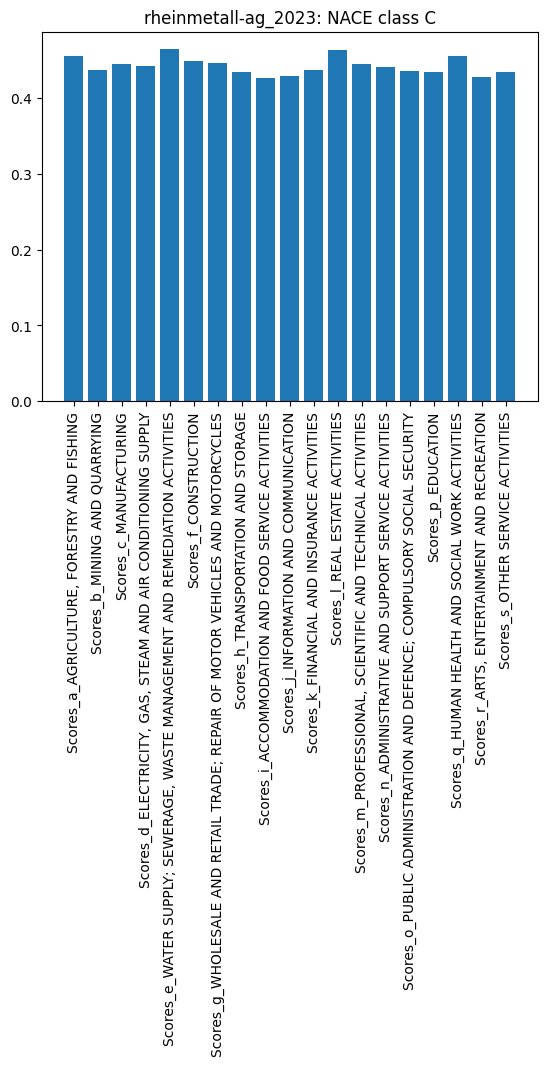

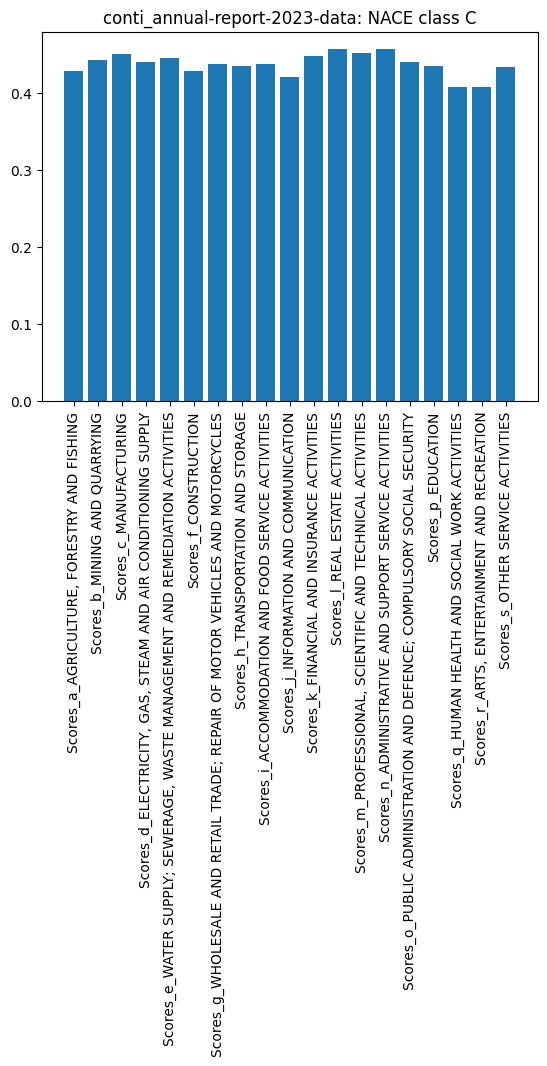

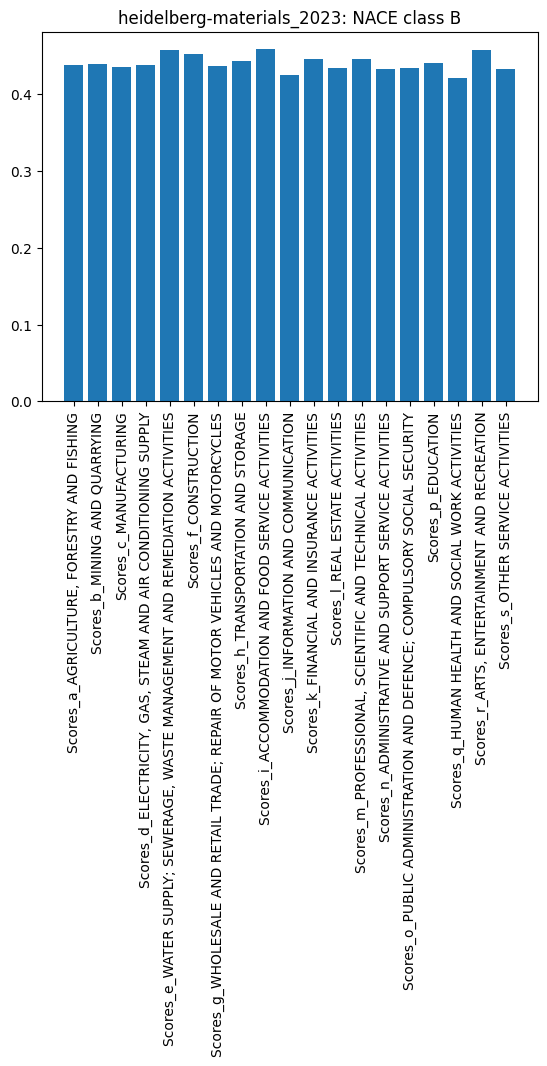

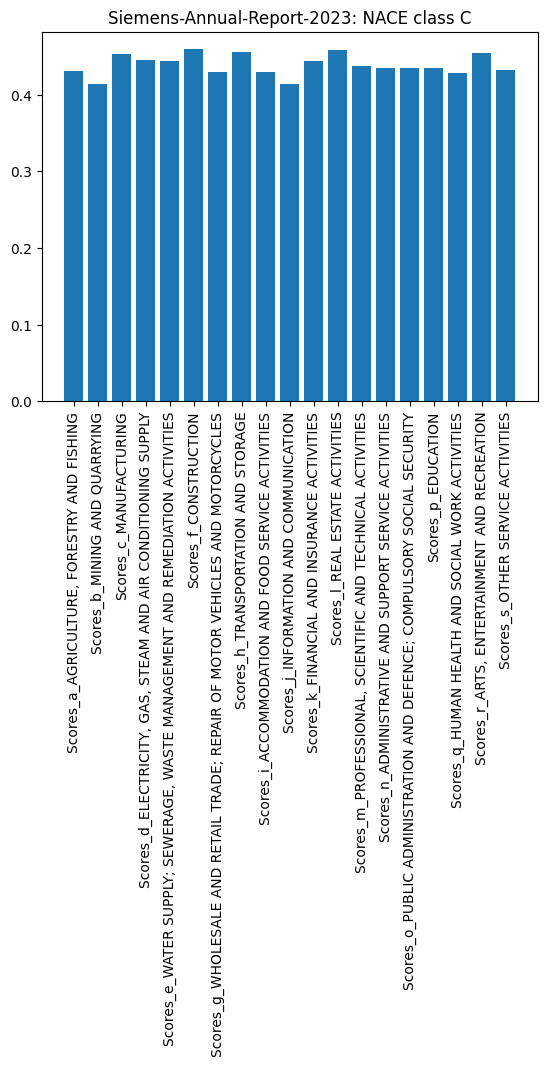

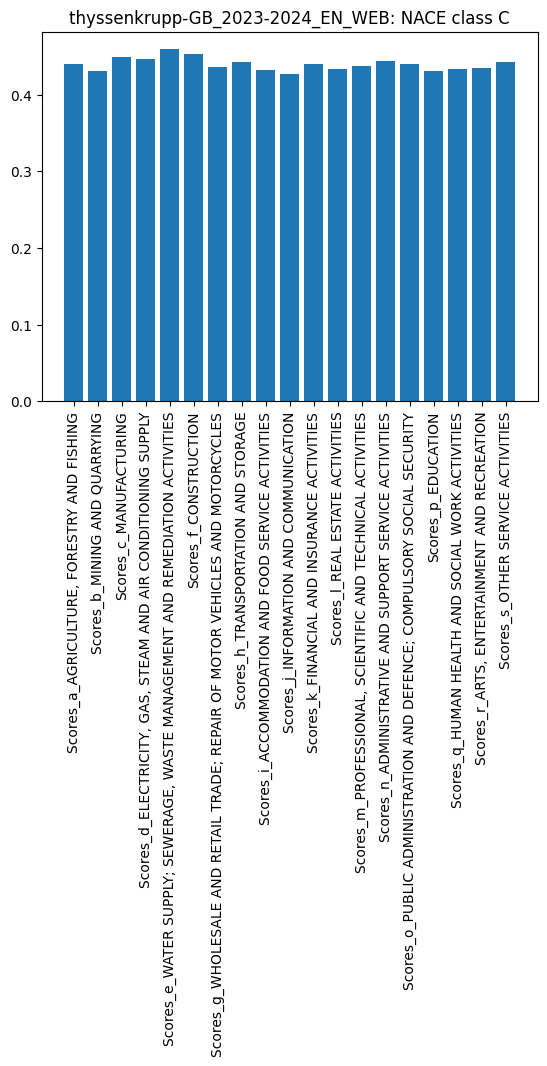

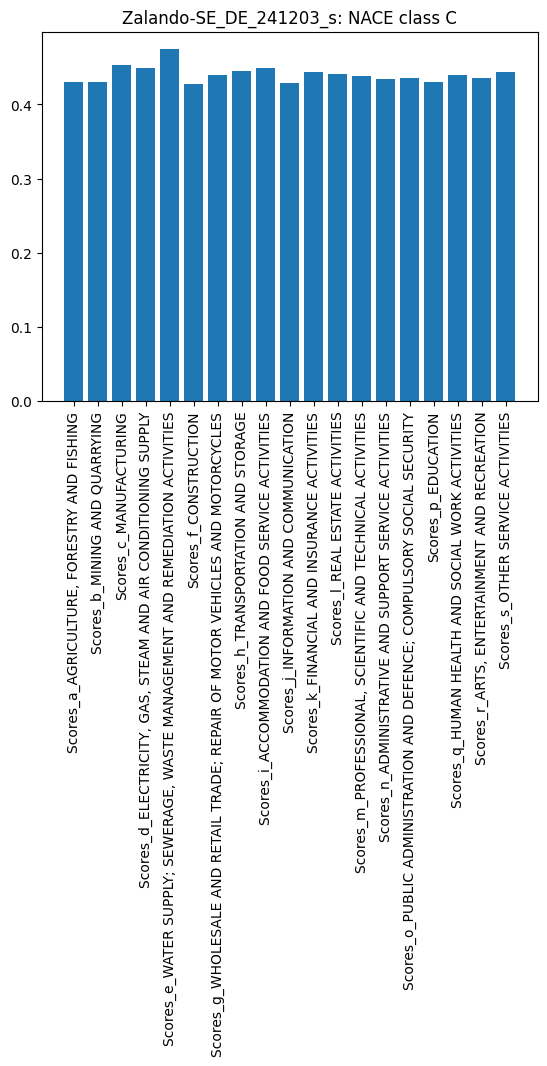

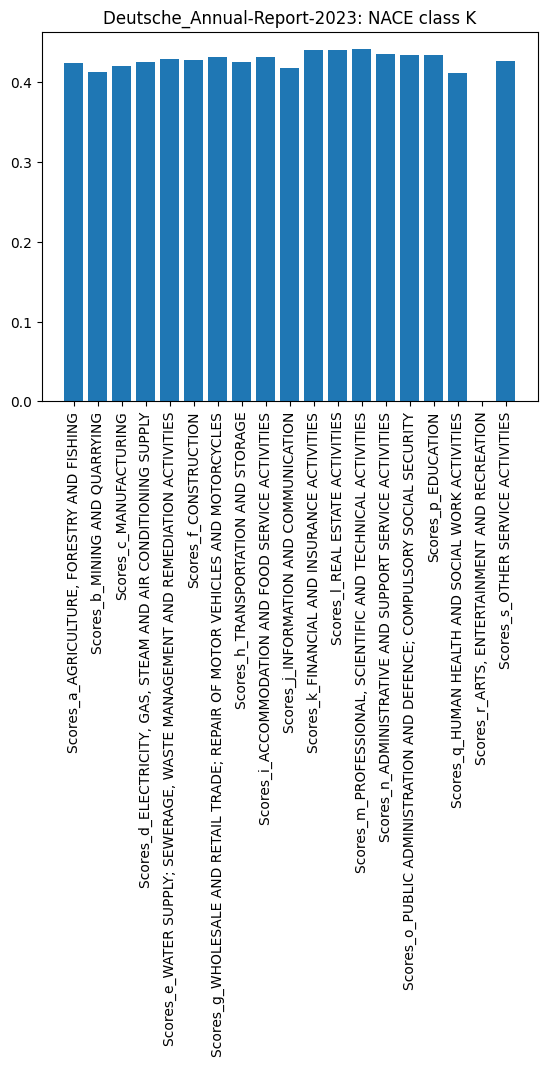

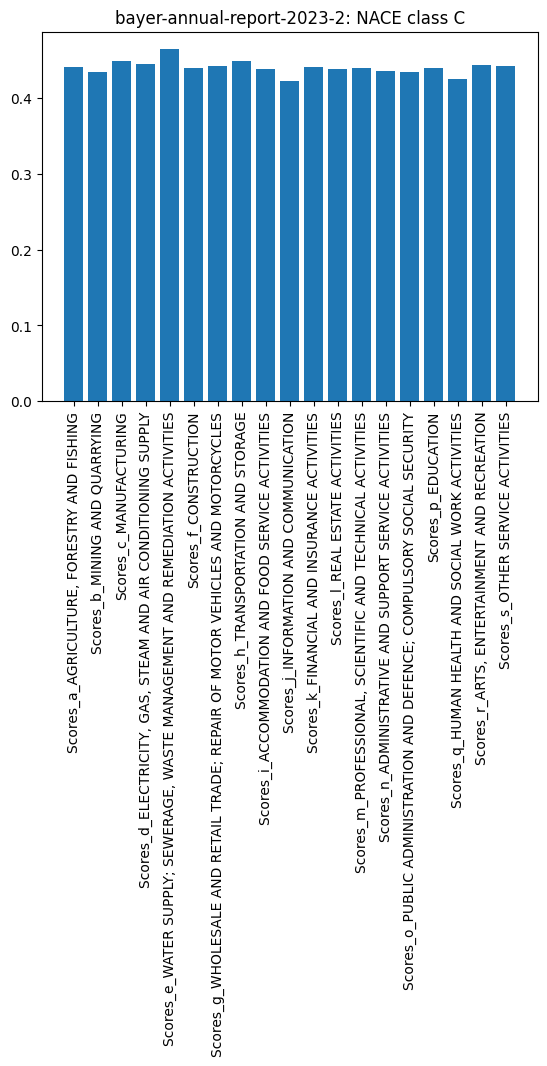

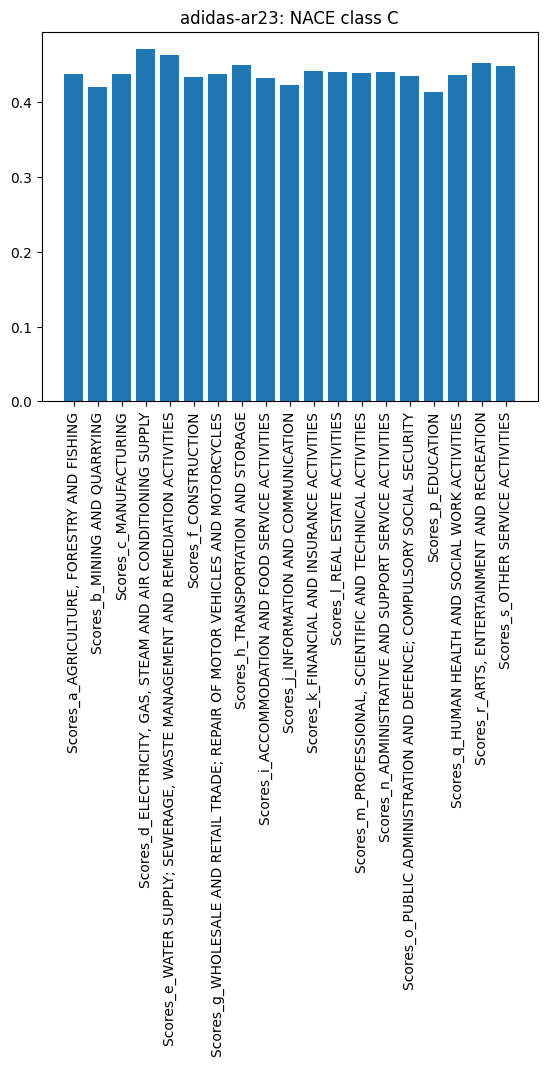

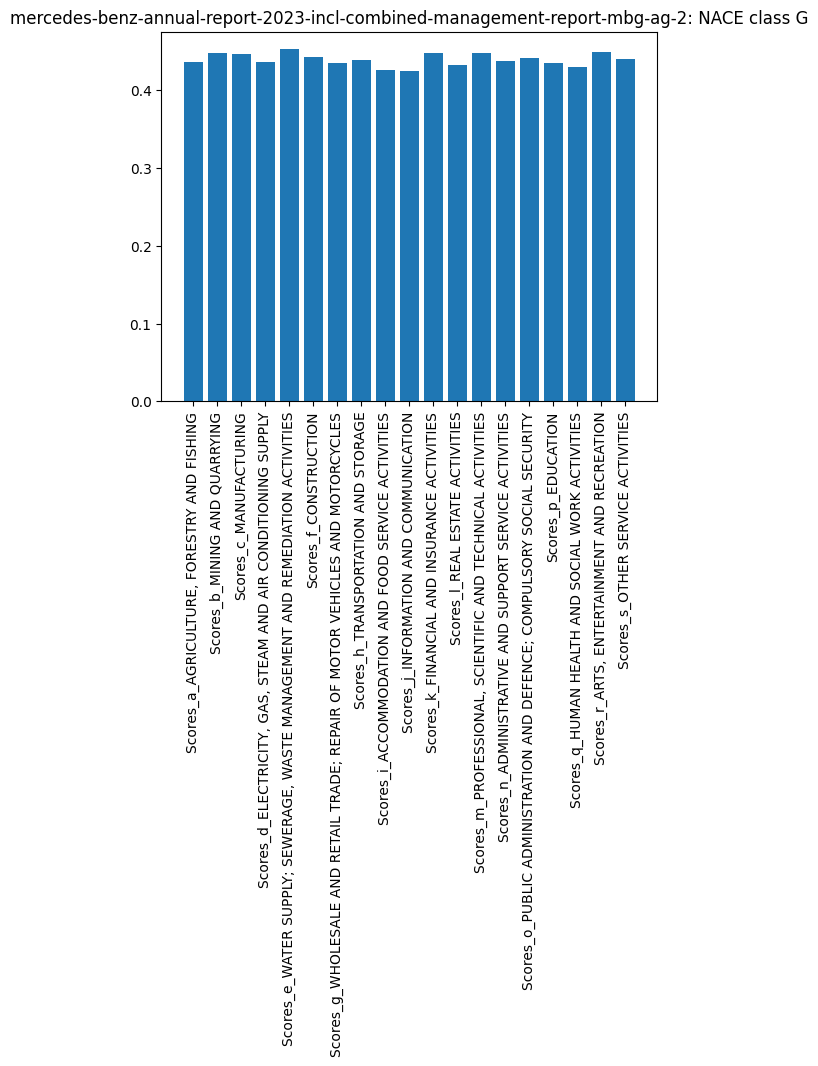

In [29]:
for i in range(len(df_sentence_similarities)):
    plt.bar(df_sentence_similarities[i][1].iloc[:,3:].columns, df_sentence_similarities[i][1].iloc[:, 3:][df_sentence_similarities[i][1].iloc[:, 3:] > cos_threshold].mean())
    plt.xticks(rotation=90)
    plt.title(f"{os.path.basename(df_sentence_similarities[i][0])}: NACE class {NACE_codes[df_sentence_similarities[i][0]+'.csv']}")
    plt.show()

### Visualize distributions

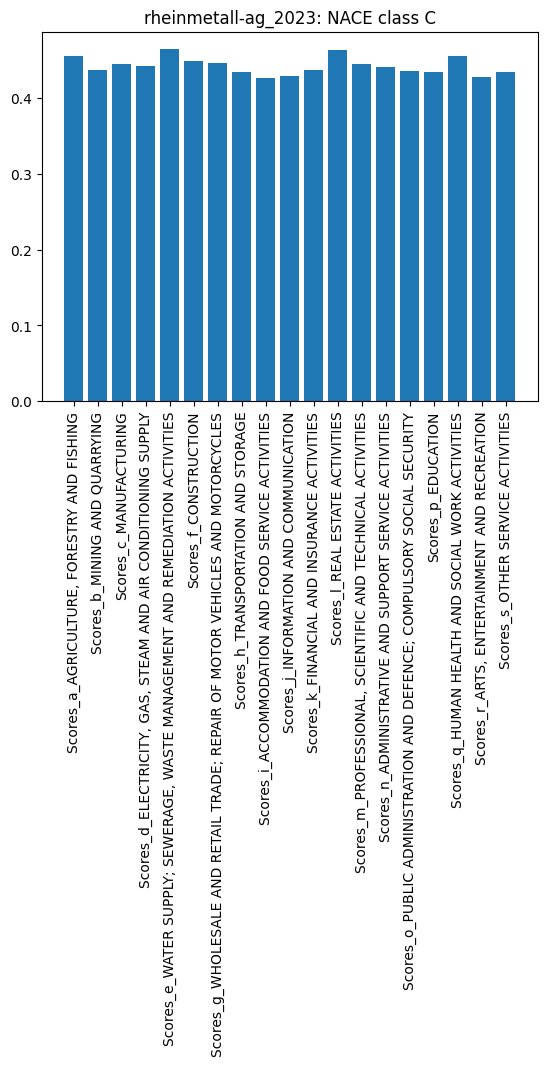

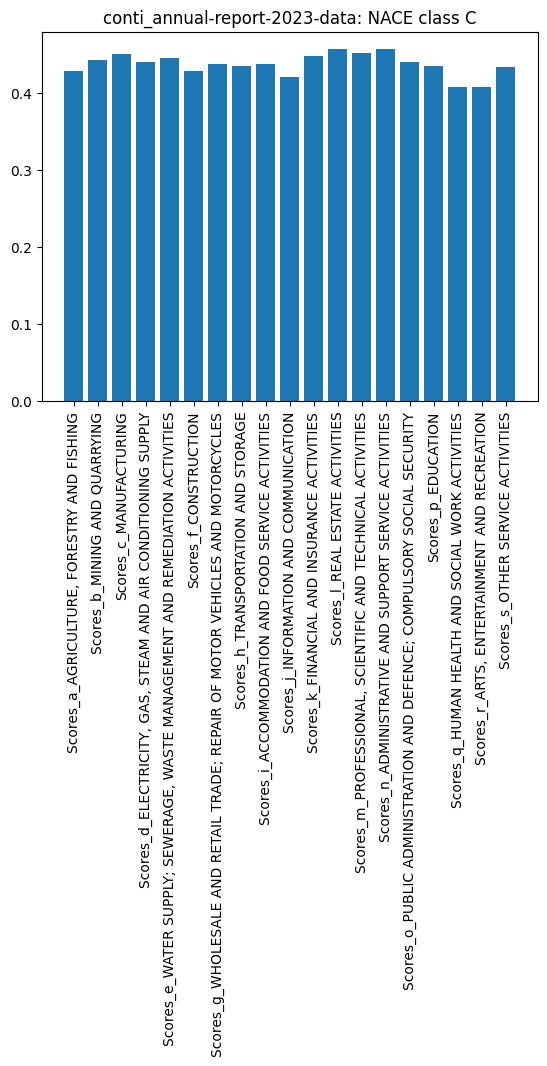

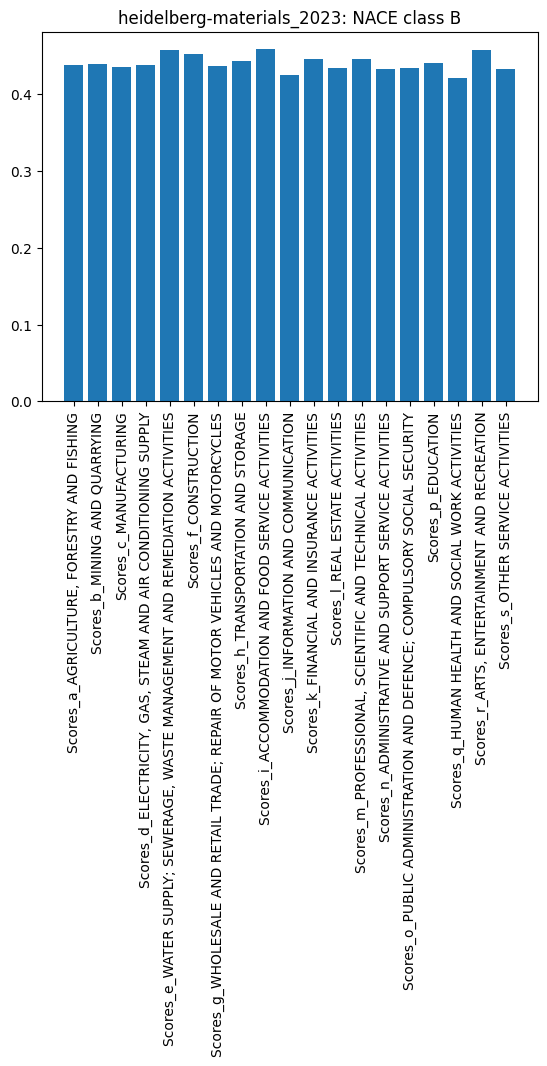

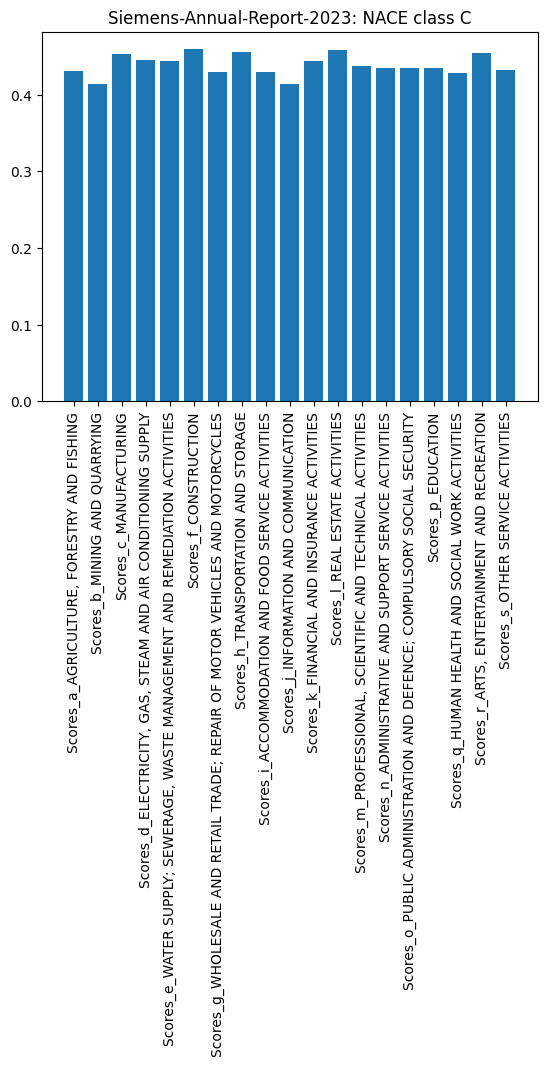

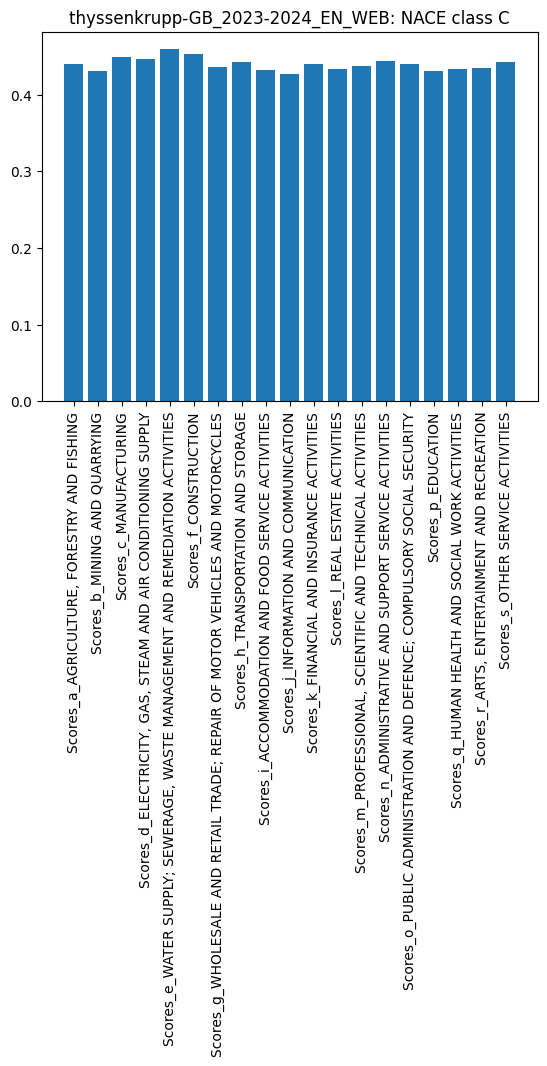

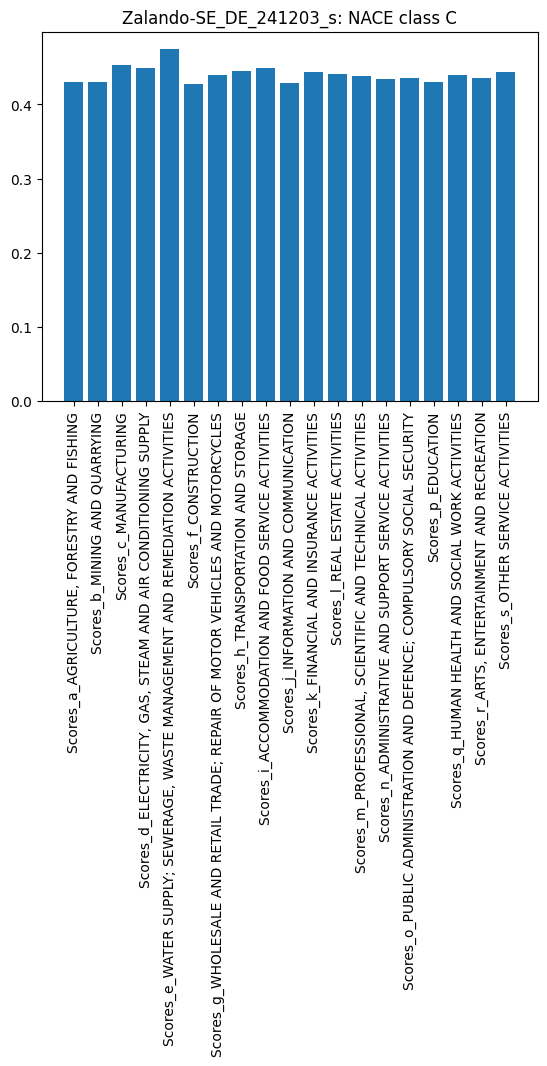

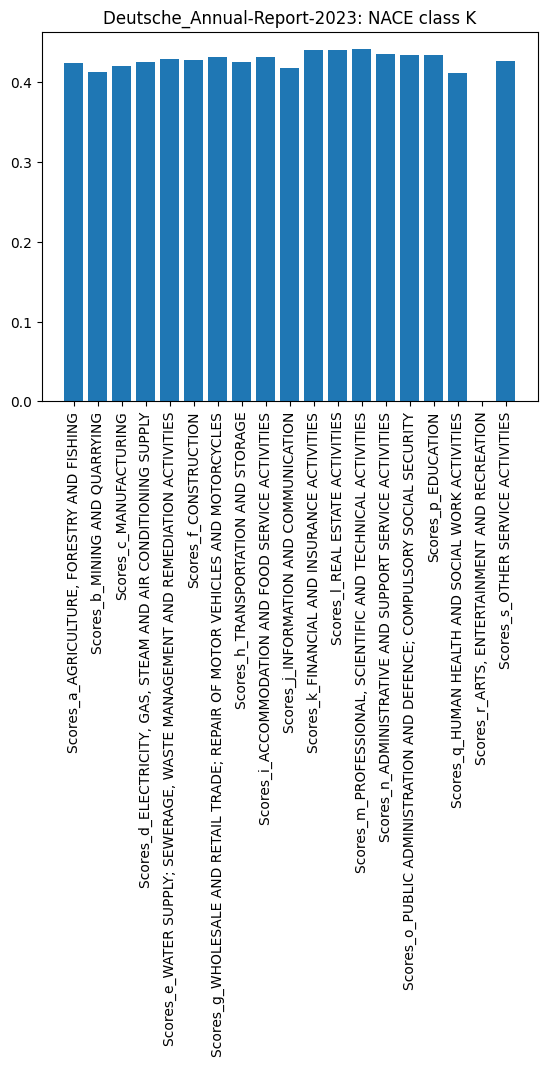

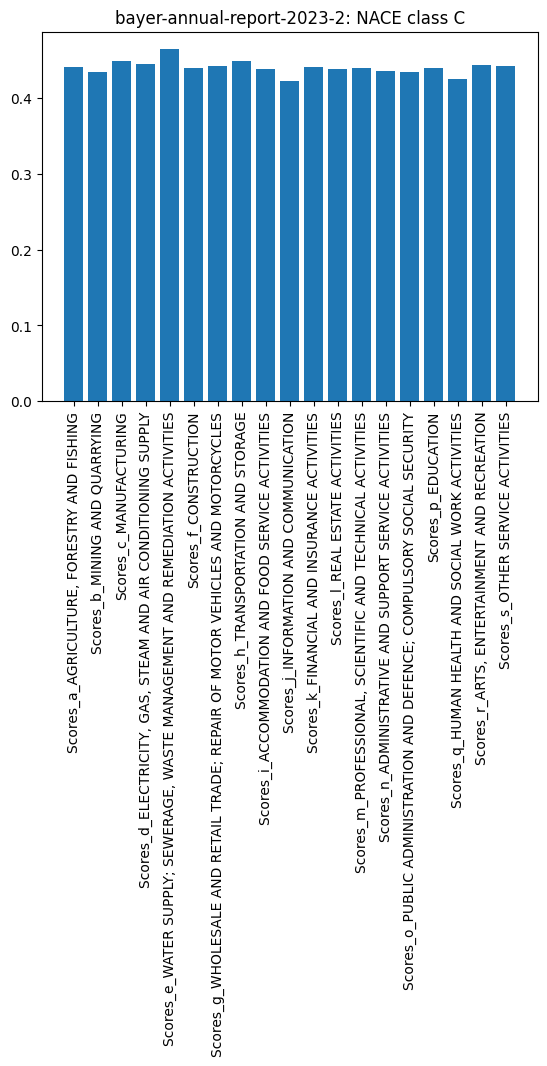

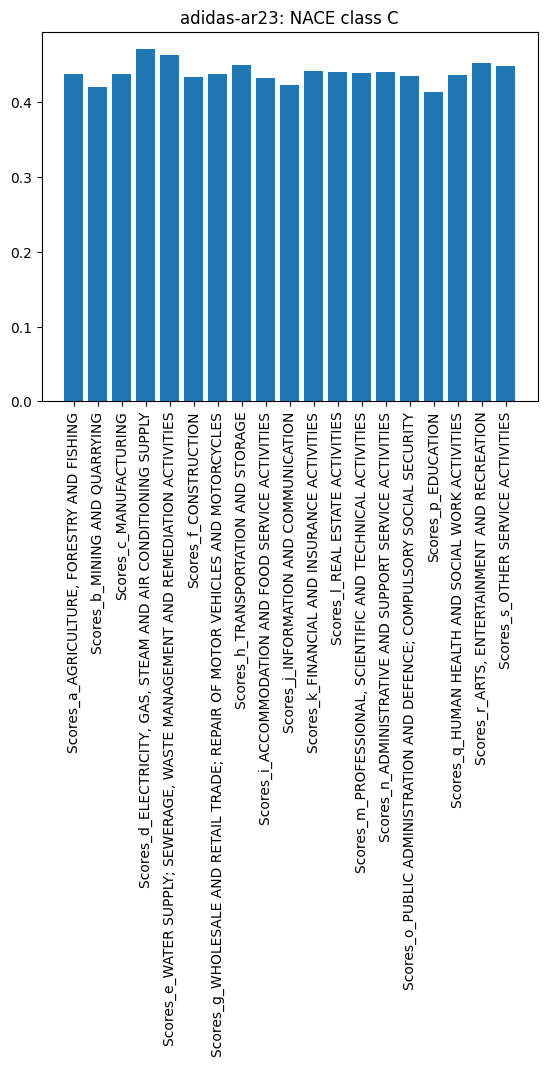

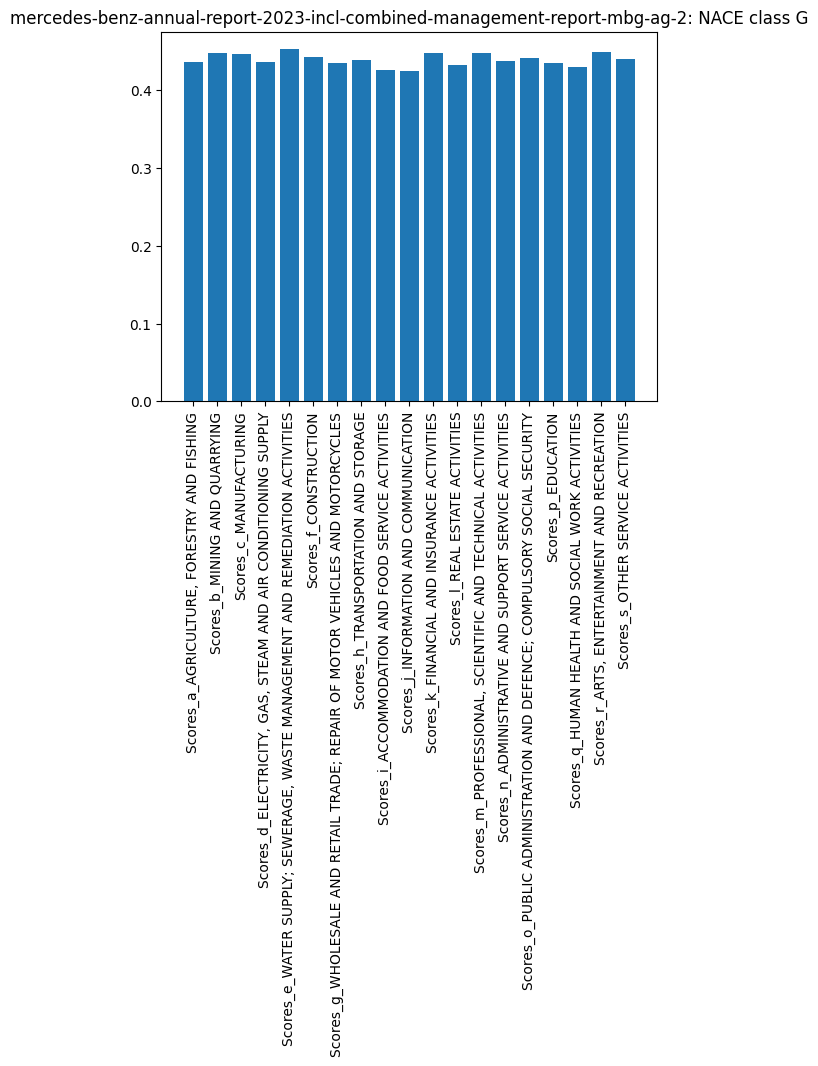

In [30]:
for i in range(len(df_sentence_similarities)):
    plt.bar(df_sentence_similarities[i][1].iloc[:,3:].columns, df_sentence_similarities[i][1].iloc[:, 3:][df_sentence_similarities[i][1].iloc[:, 3:] > cos_threshold].mean())
    plt.xticks(rotation=90)
    plt.title(f"{os.path.basename(df_sentence_similarities[i][0])}: NACE class {NACE_codes[df_sentence_similarities[i][0]+'.csv']}")
    plt.show()

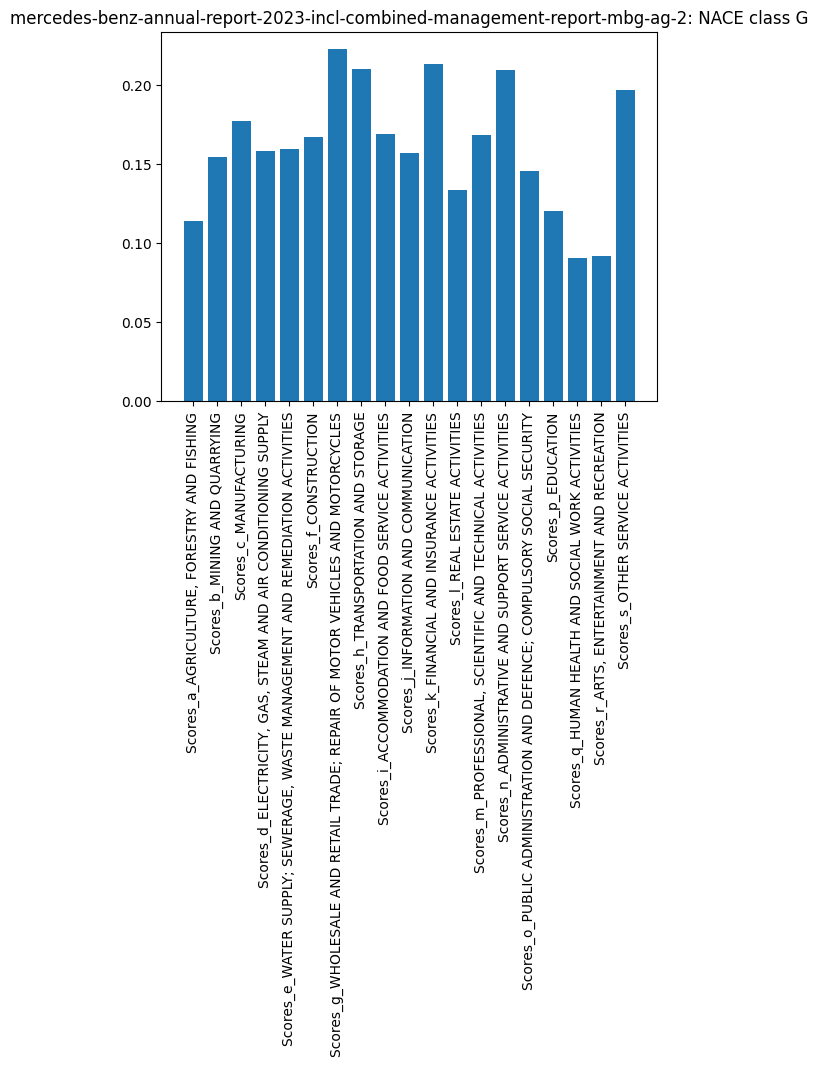

In [31]:
plt.bar(df_sentence_similarities[i][1].iloc[:,3:].columns, df_sentence_similarities[i][1].iloc[:,3:].mean())
plt.xticks(rotation=90)
plt.title(f"{os.path.basename(df_sentence_similarities[i][0])}: NACE class {NACE_codes[df_sentence_similarities[i][0]+'.csv']}")
plt.show()

In [32]:
df_sentence_similarities[0][1].iloc[:,3+i].name

'Scores_j_INFORMATION AND COMMUNICATION'

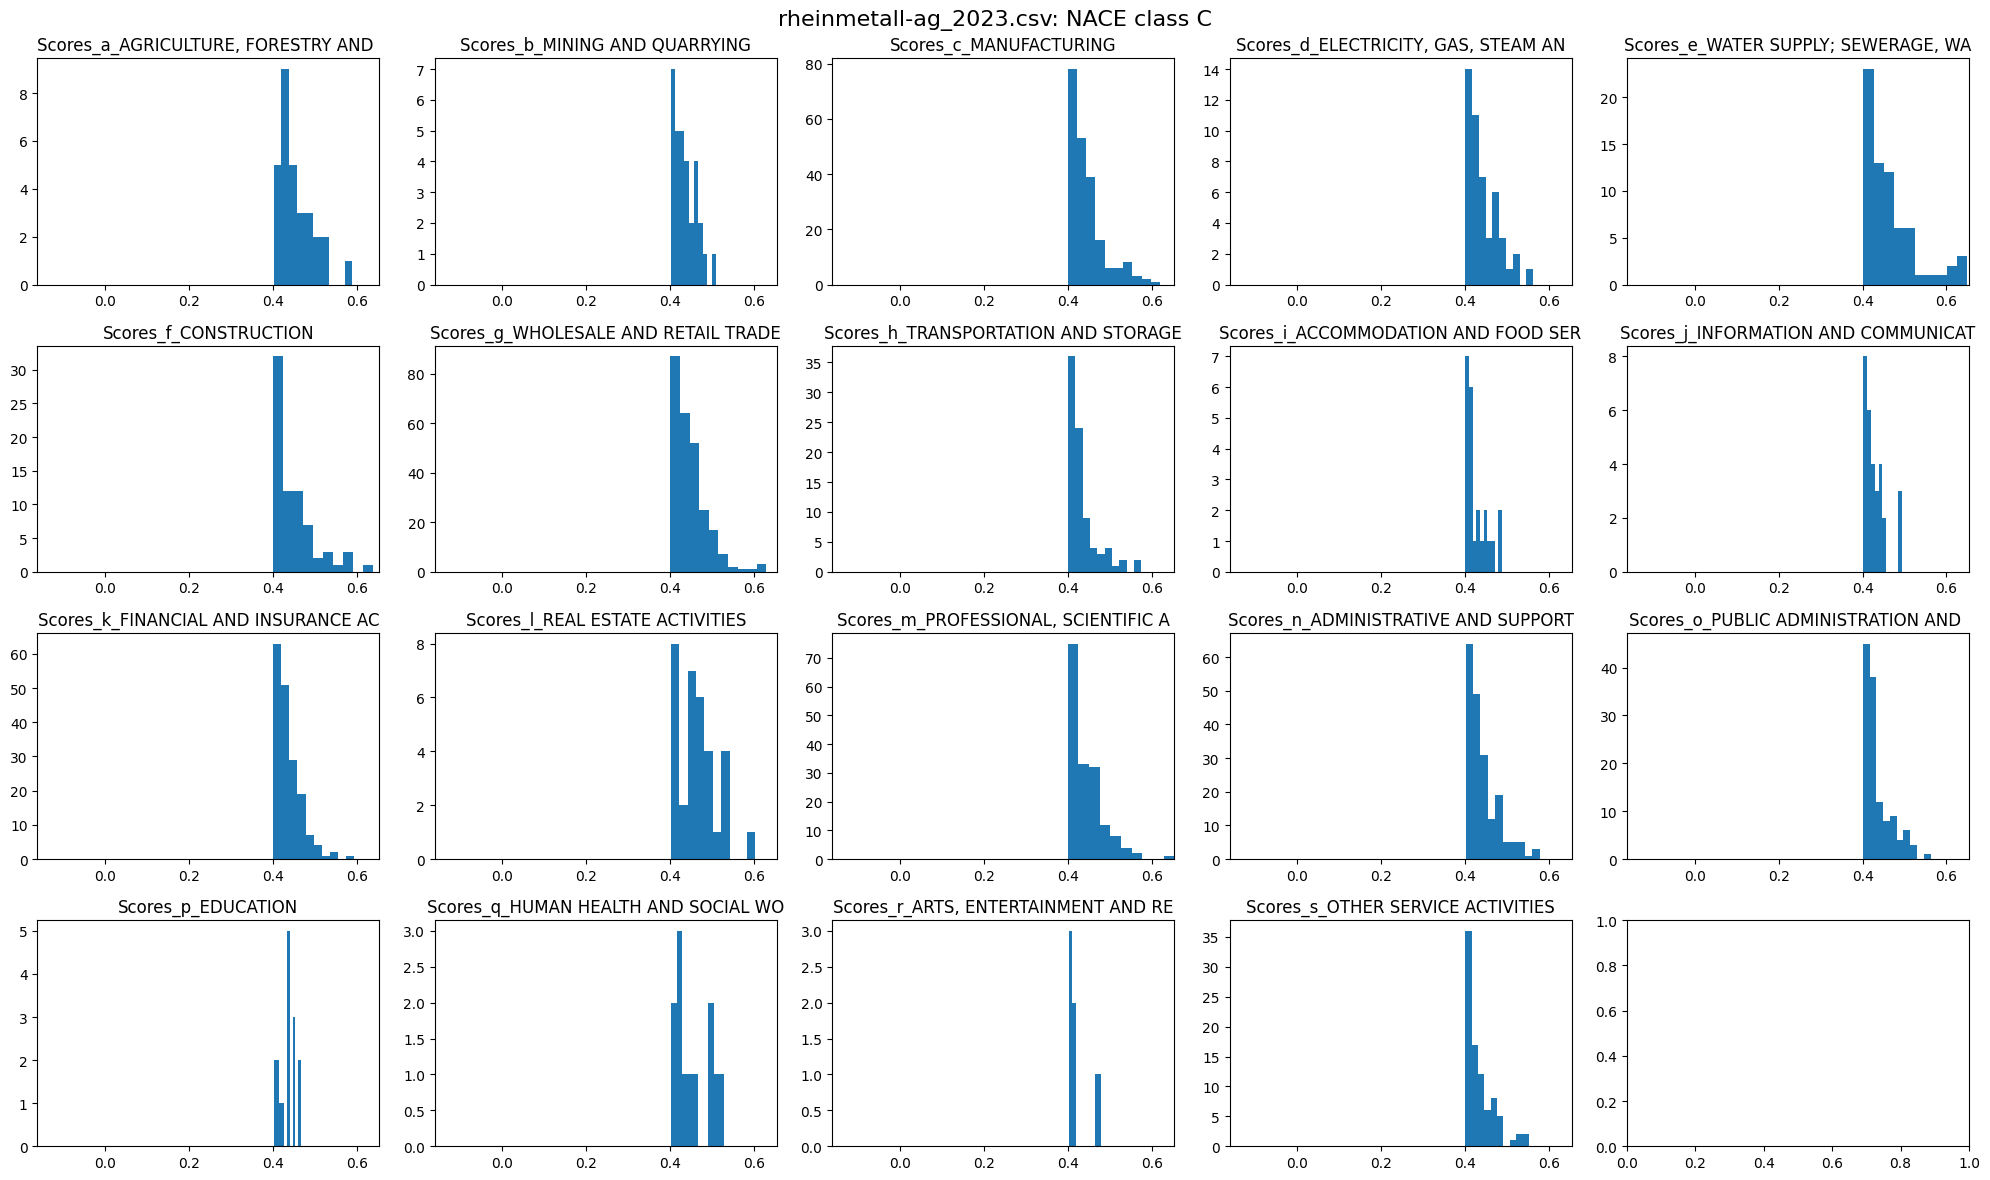

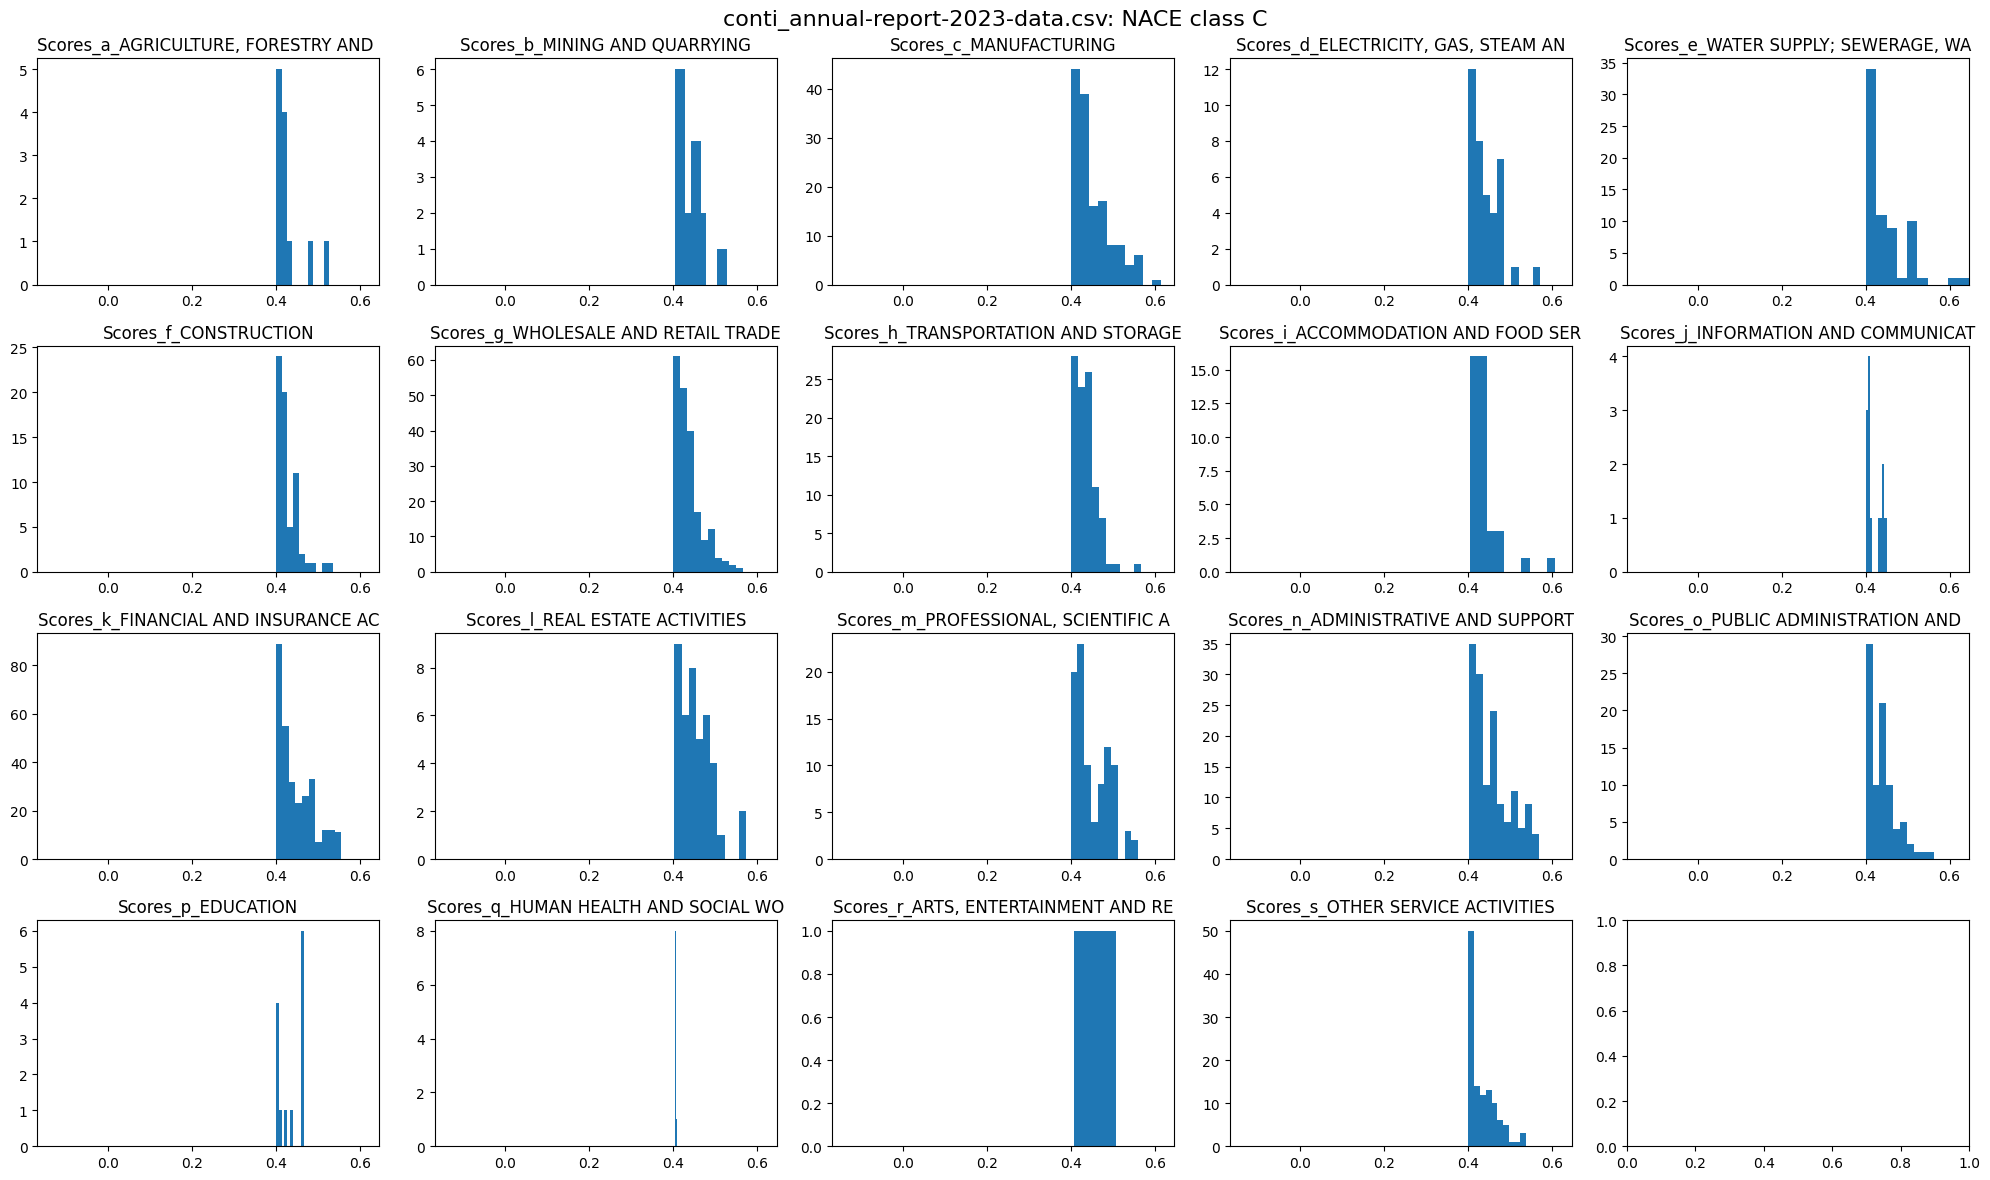

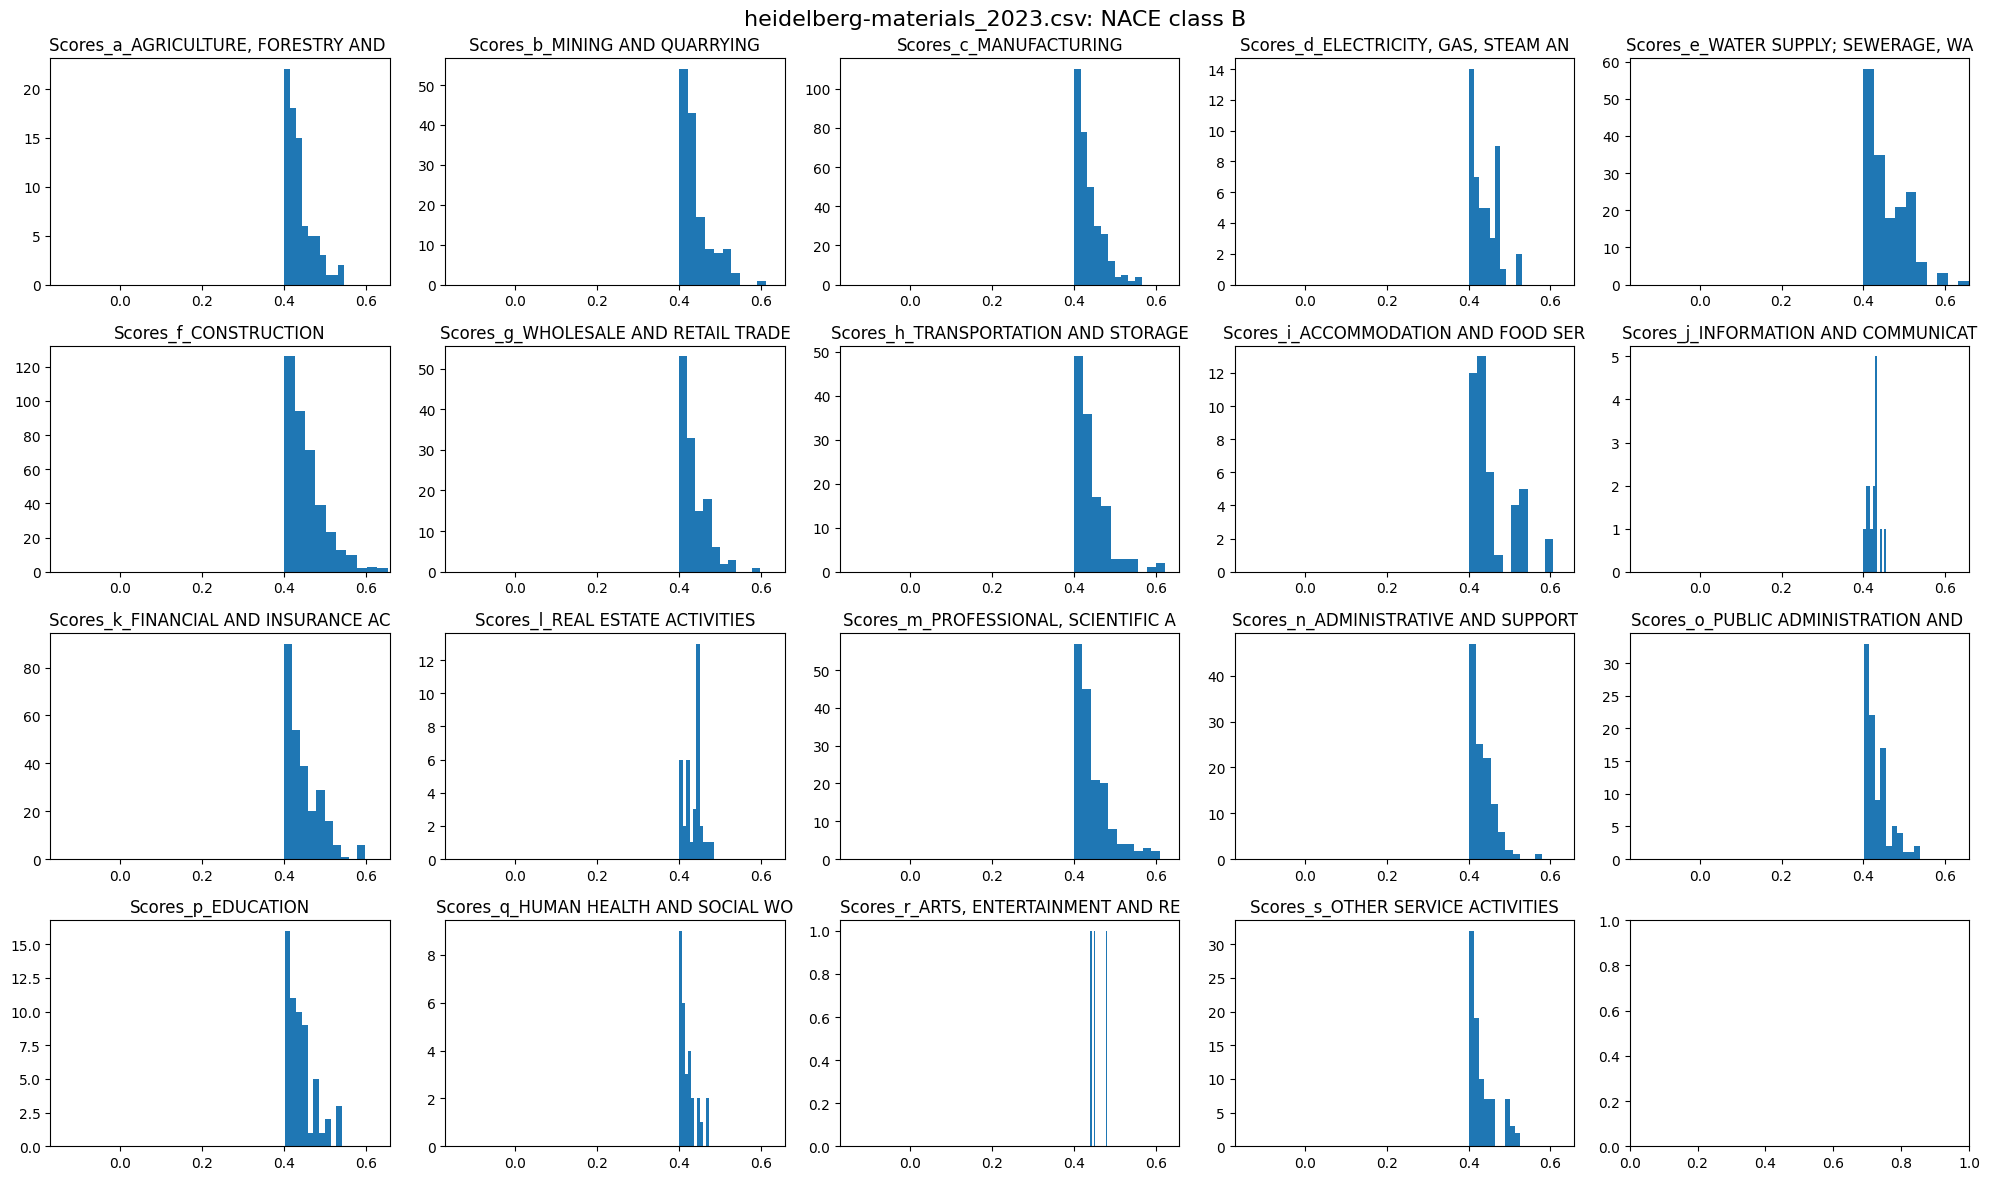

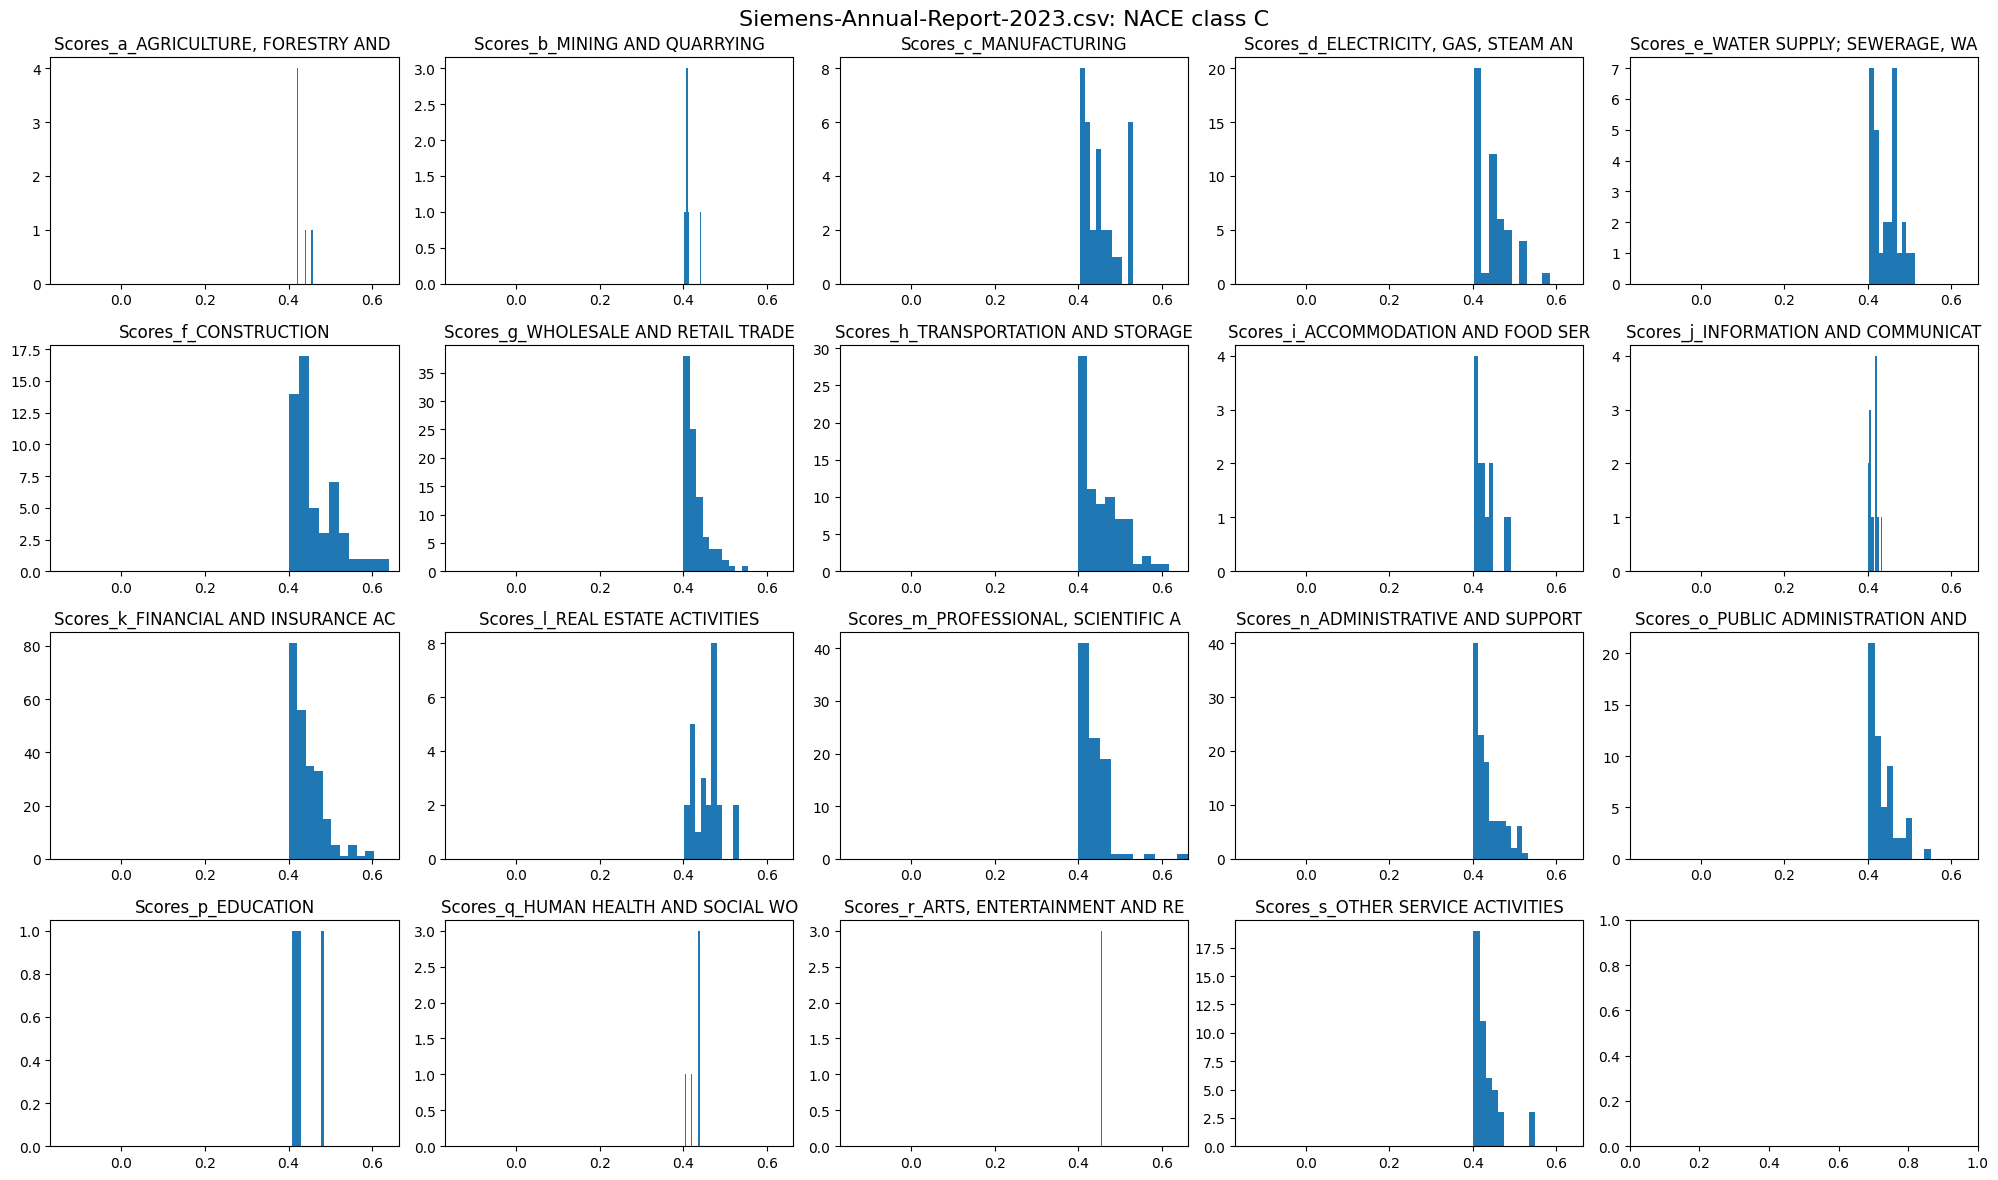

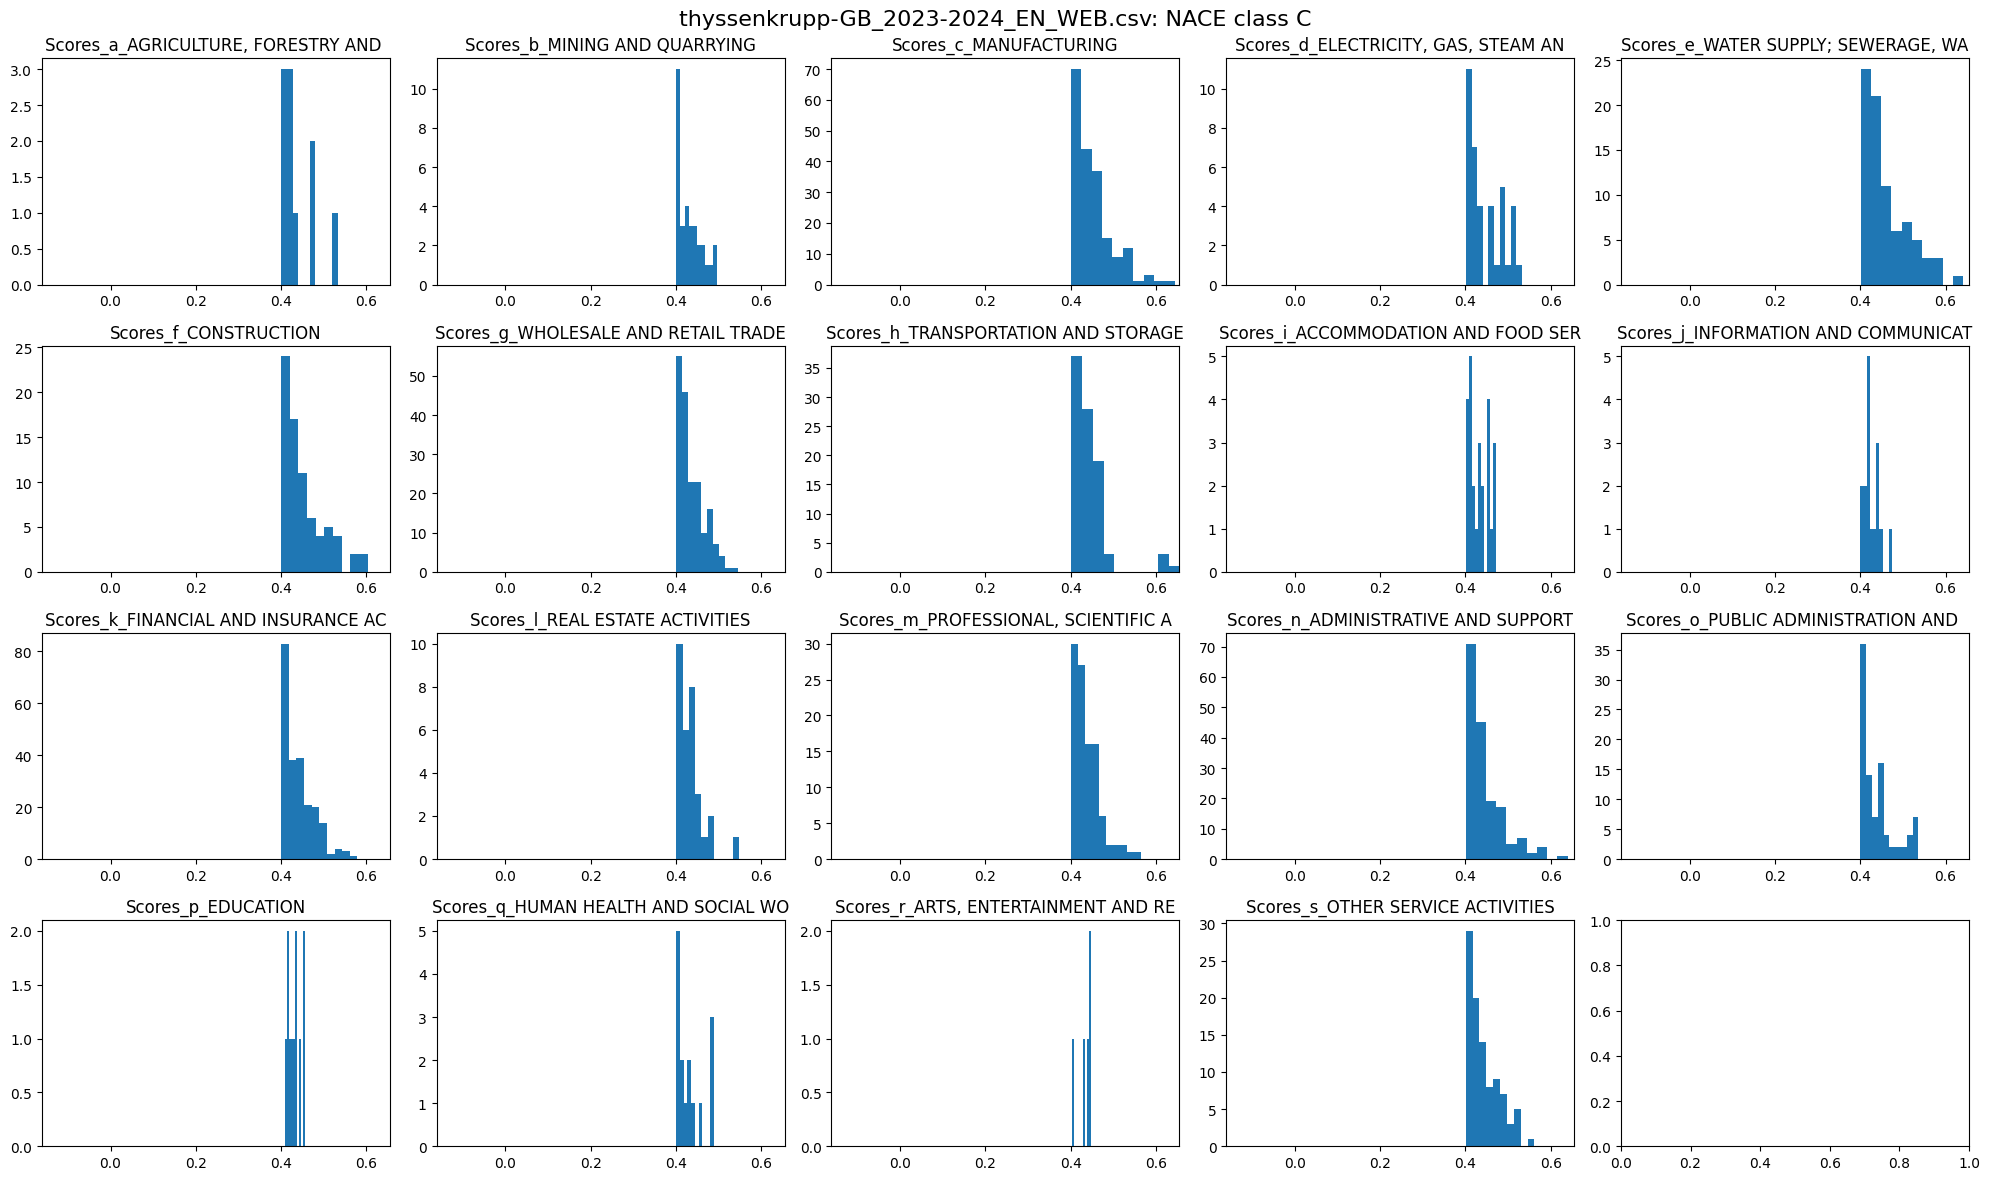

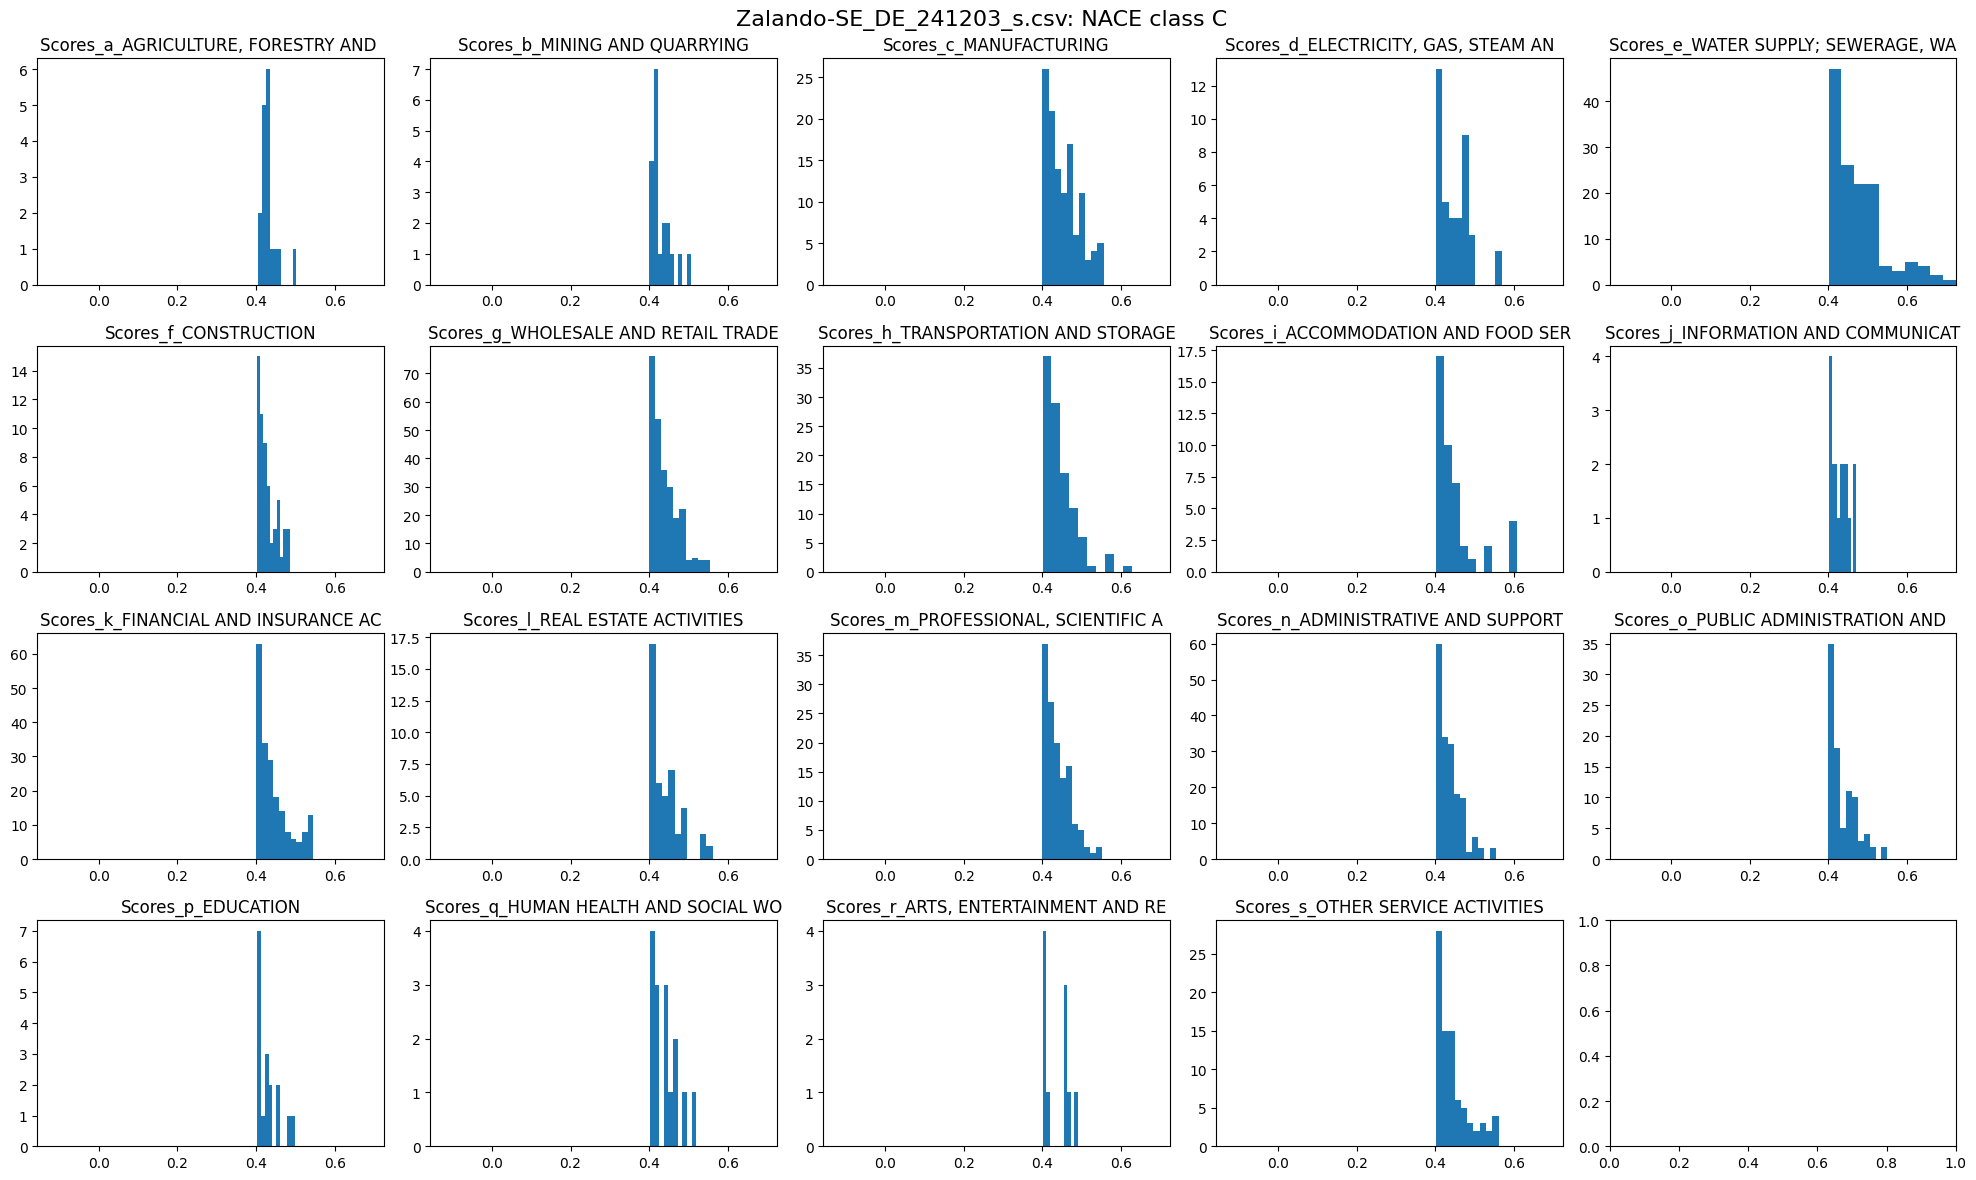

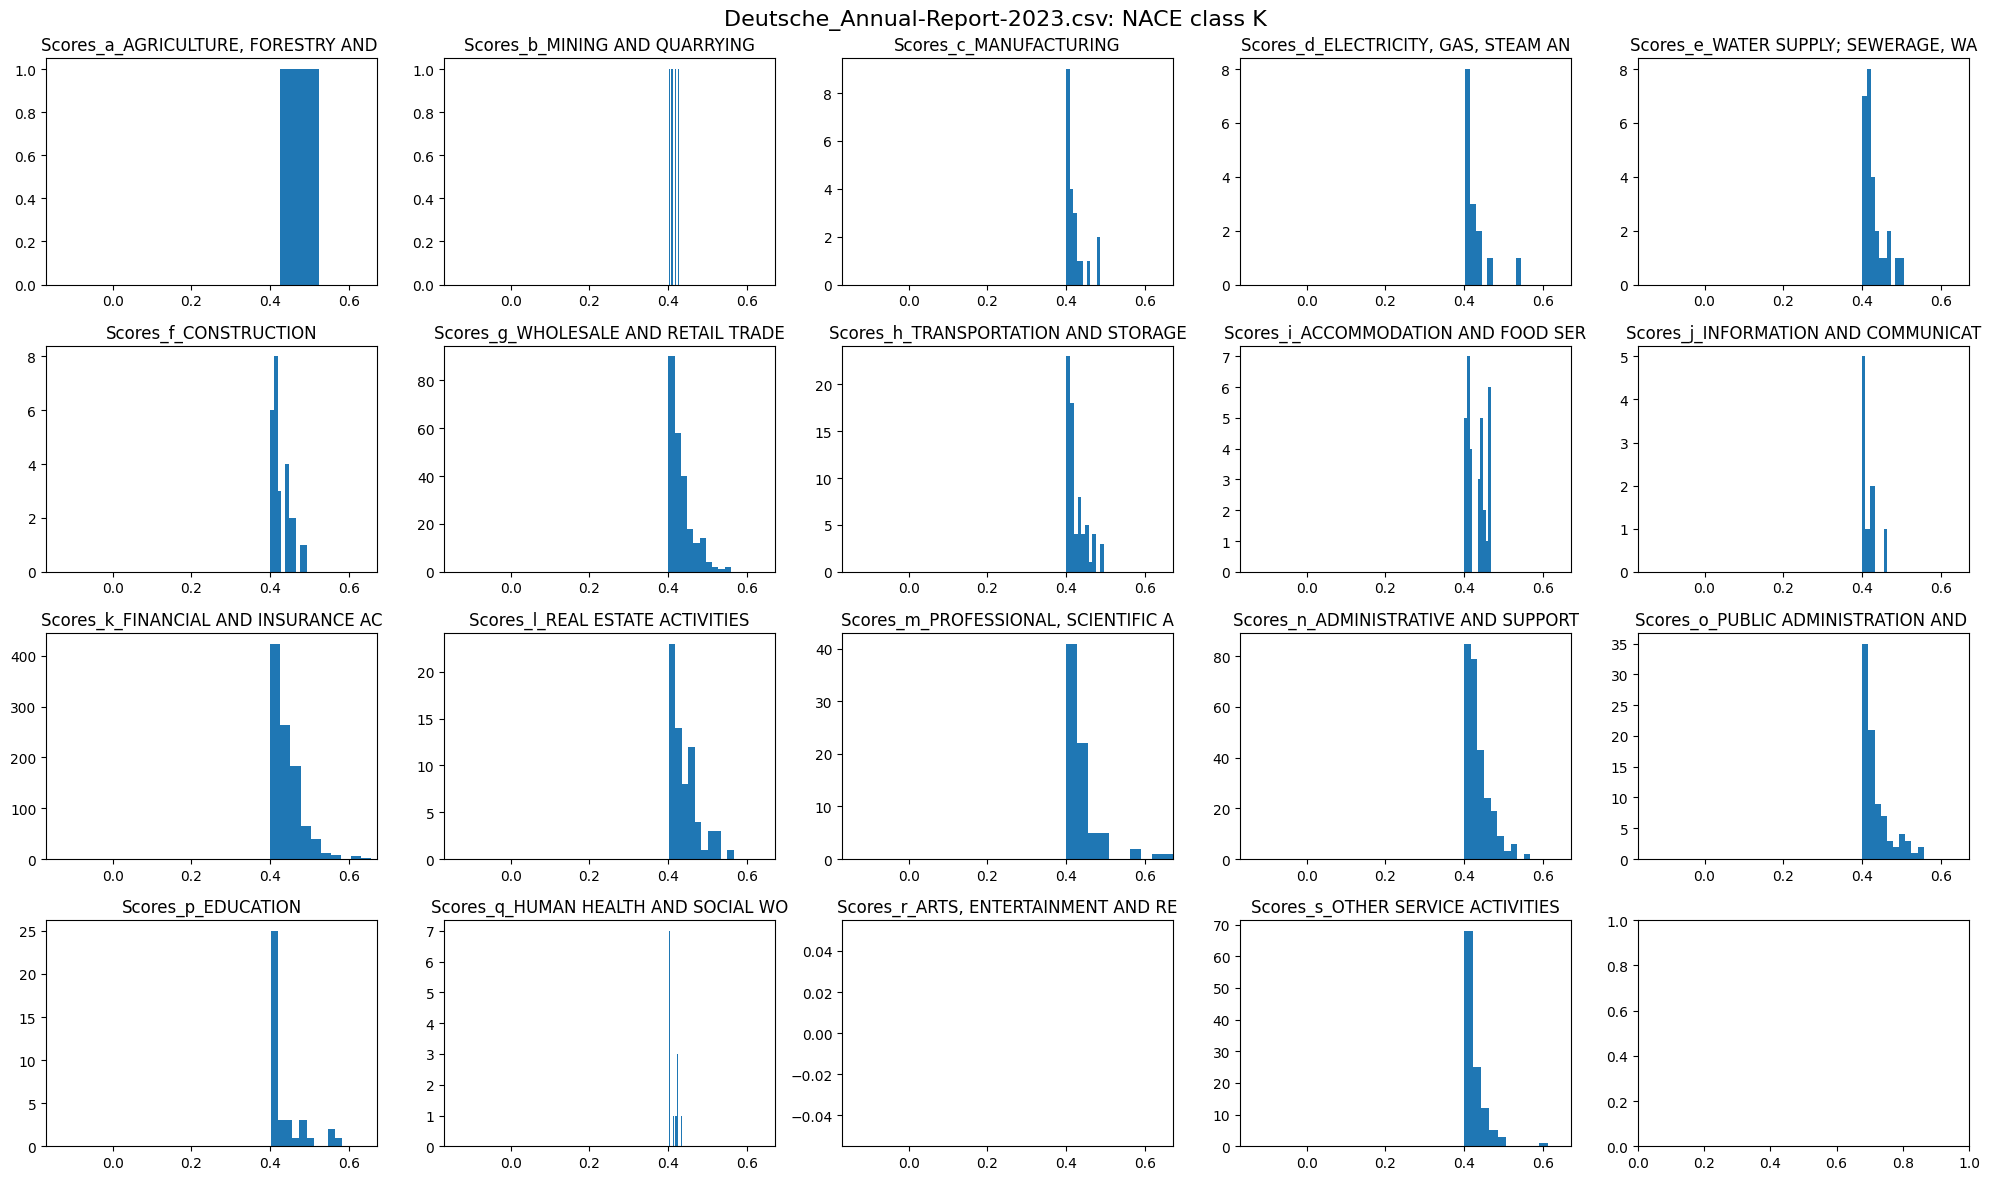

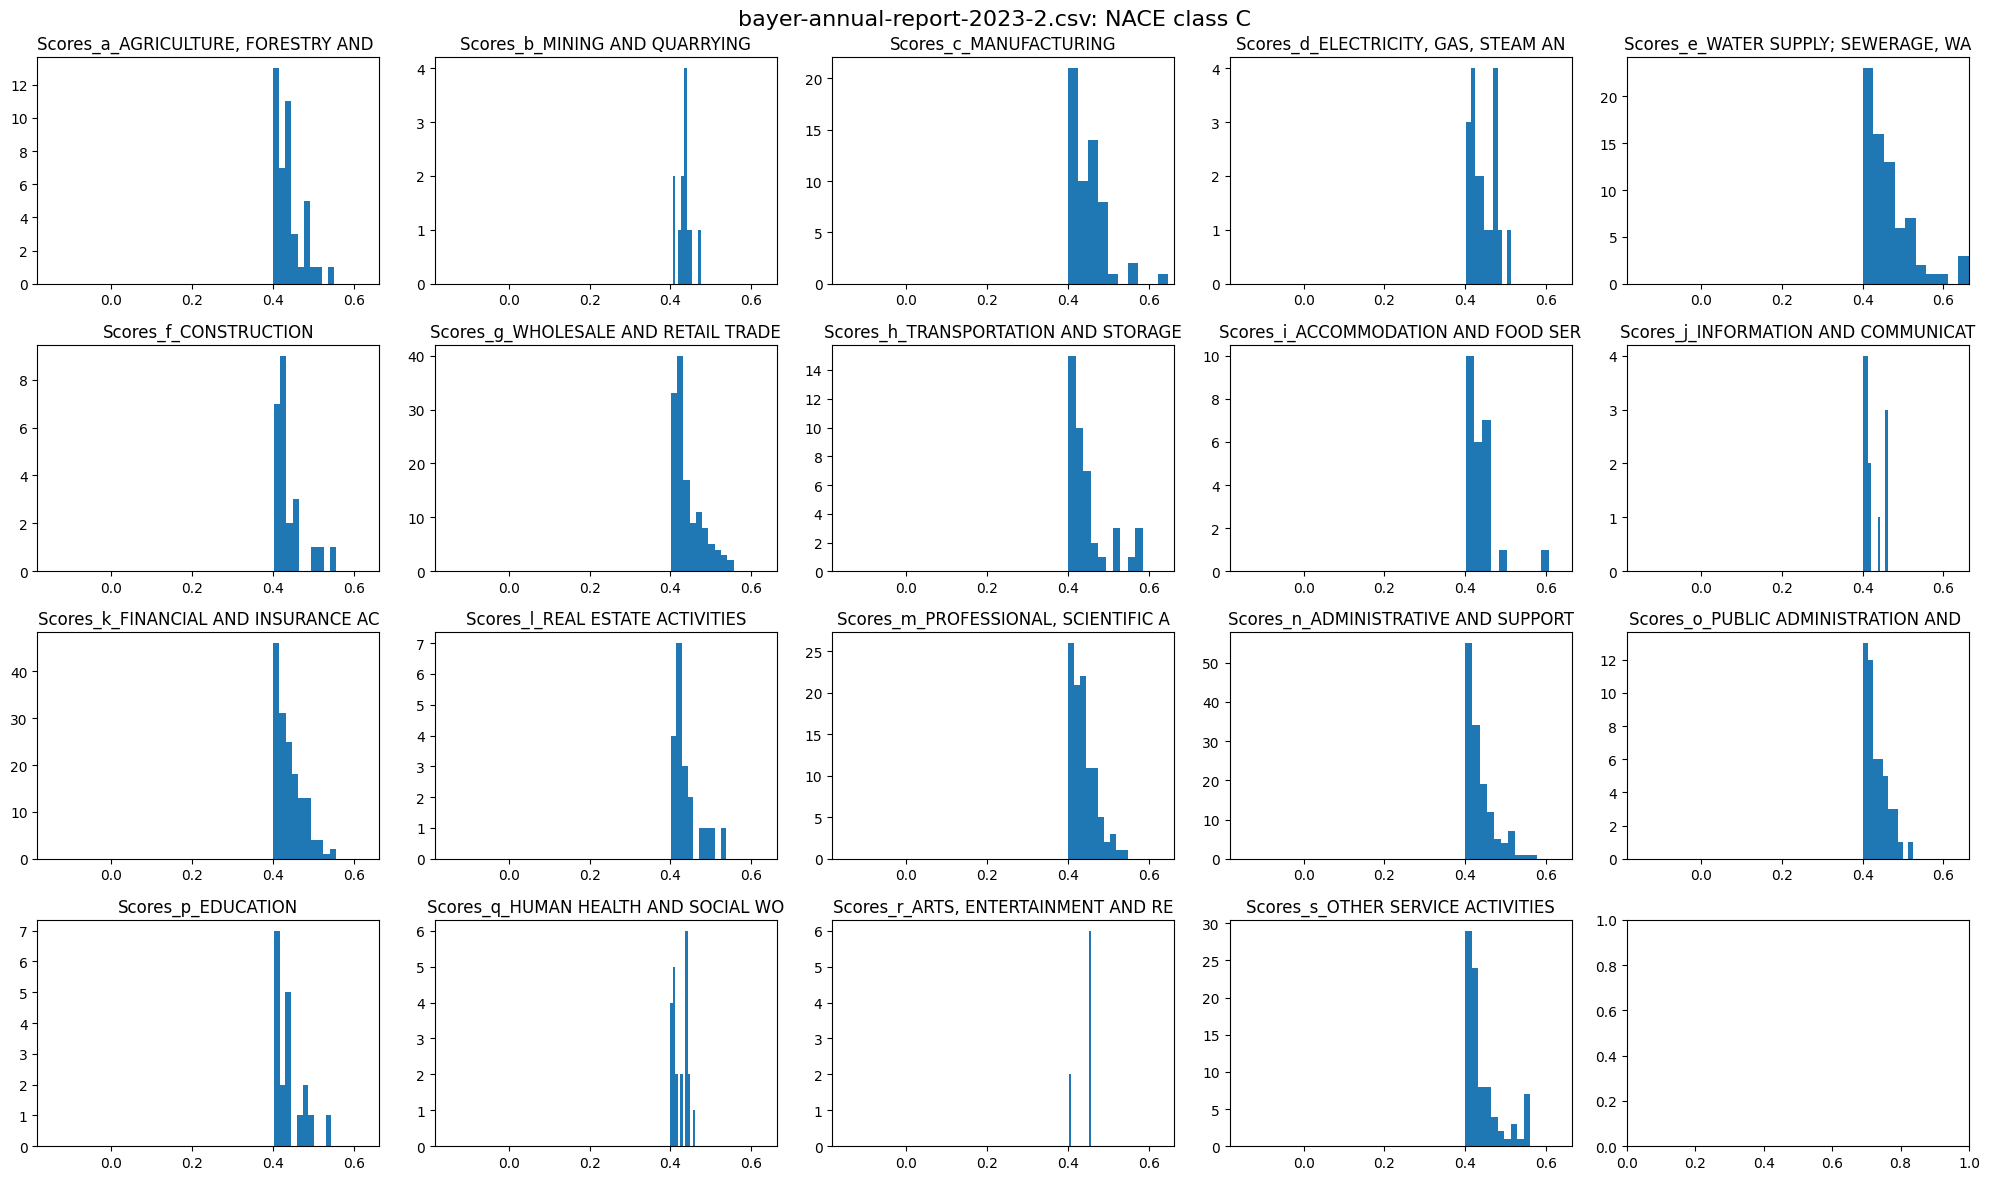

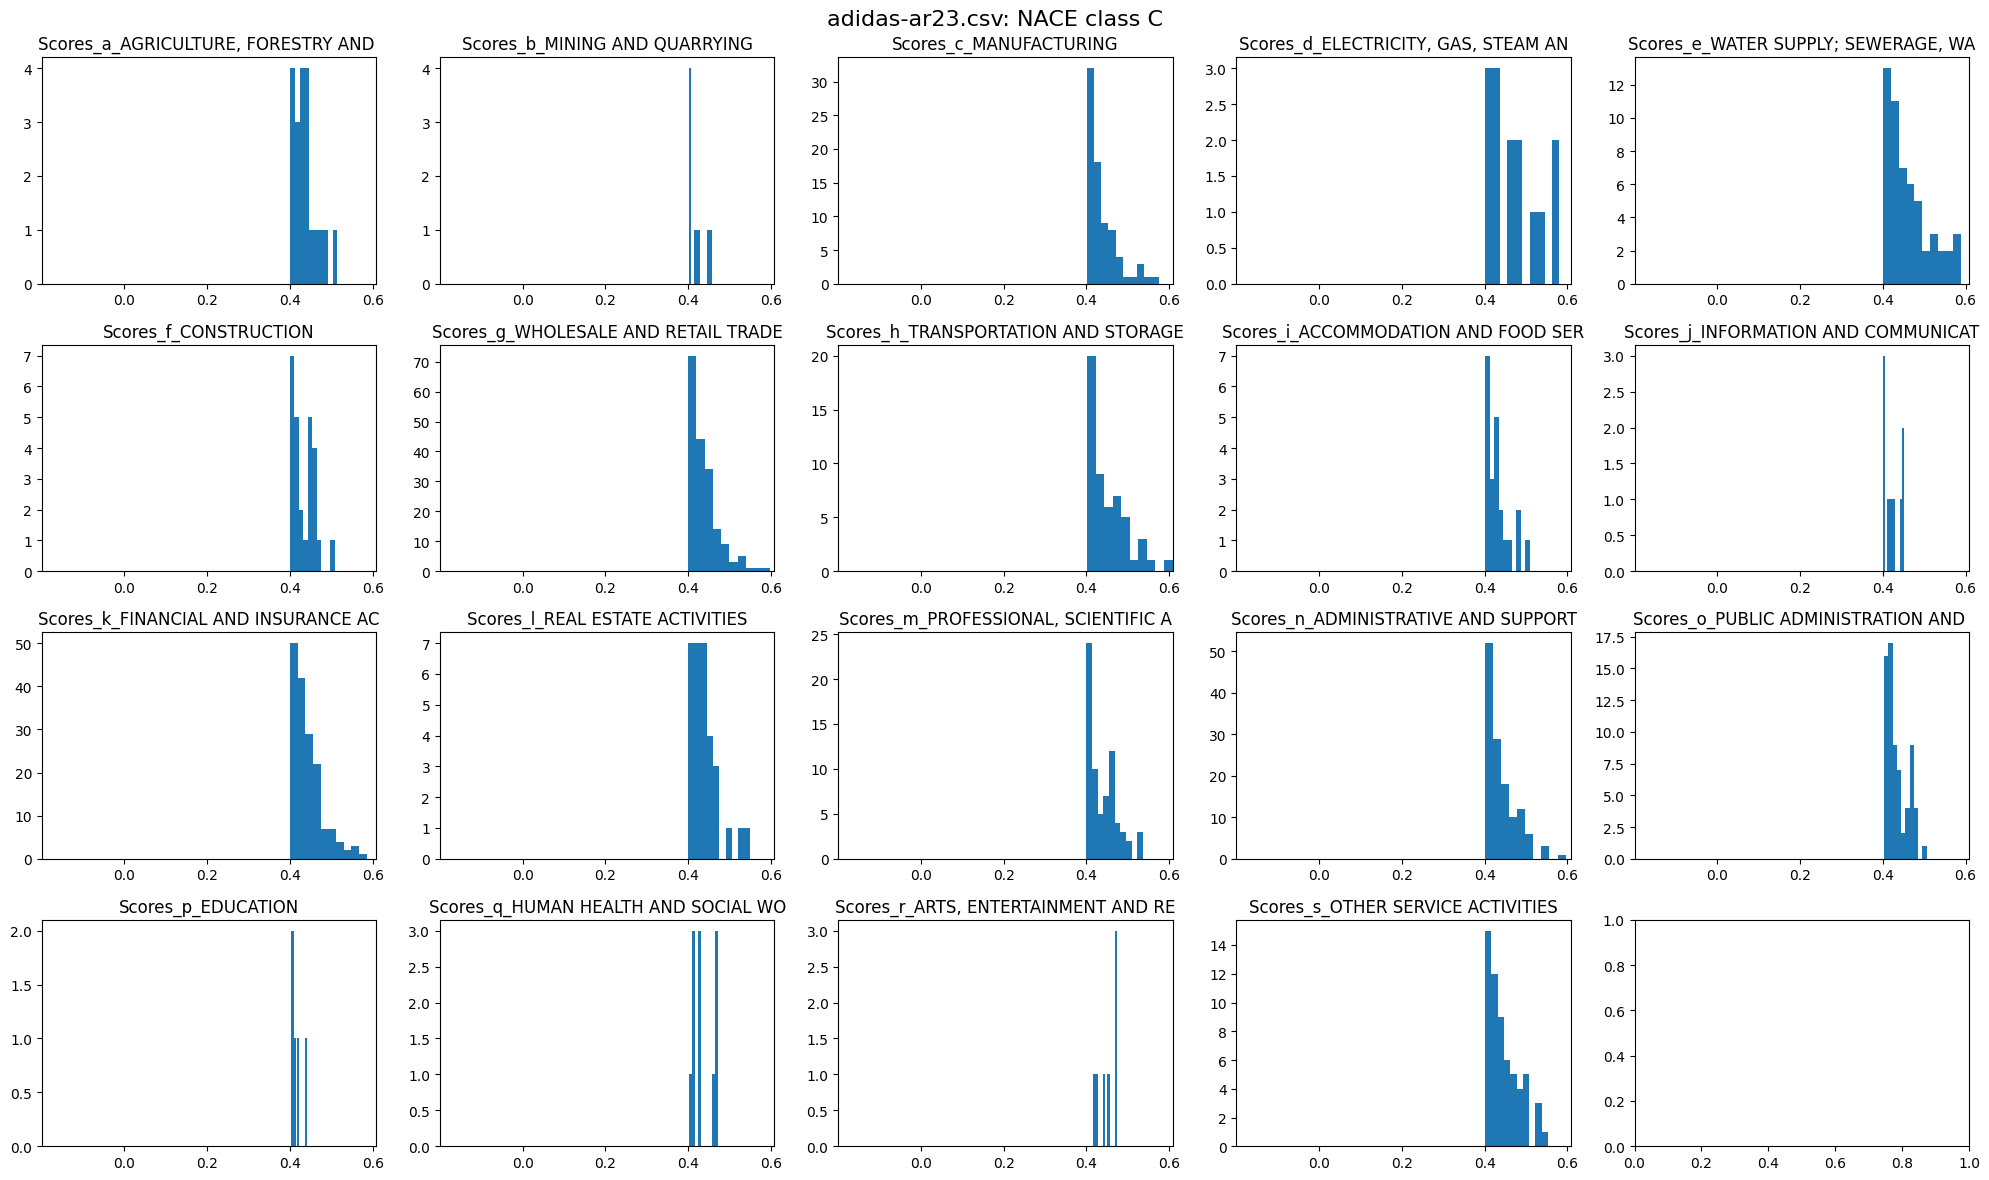

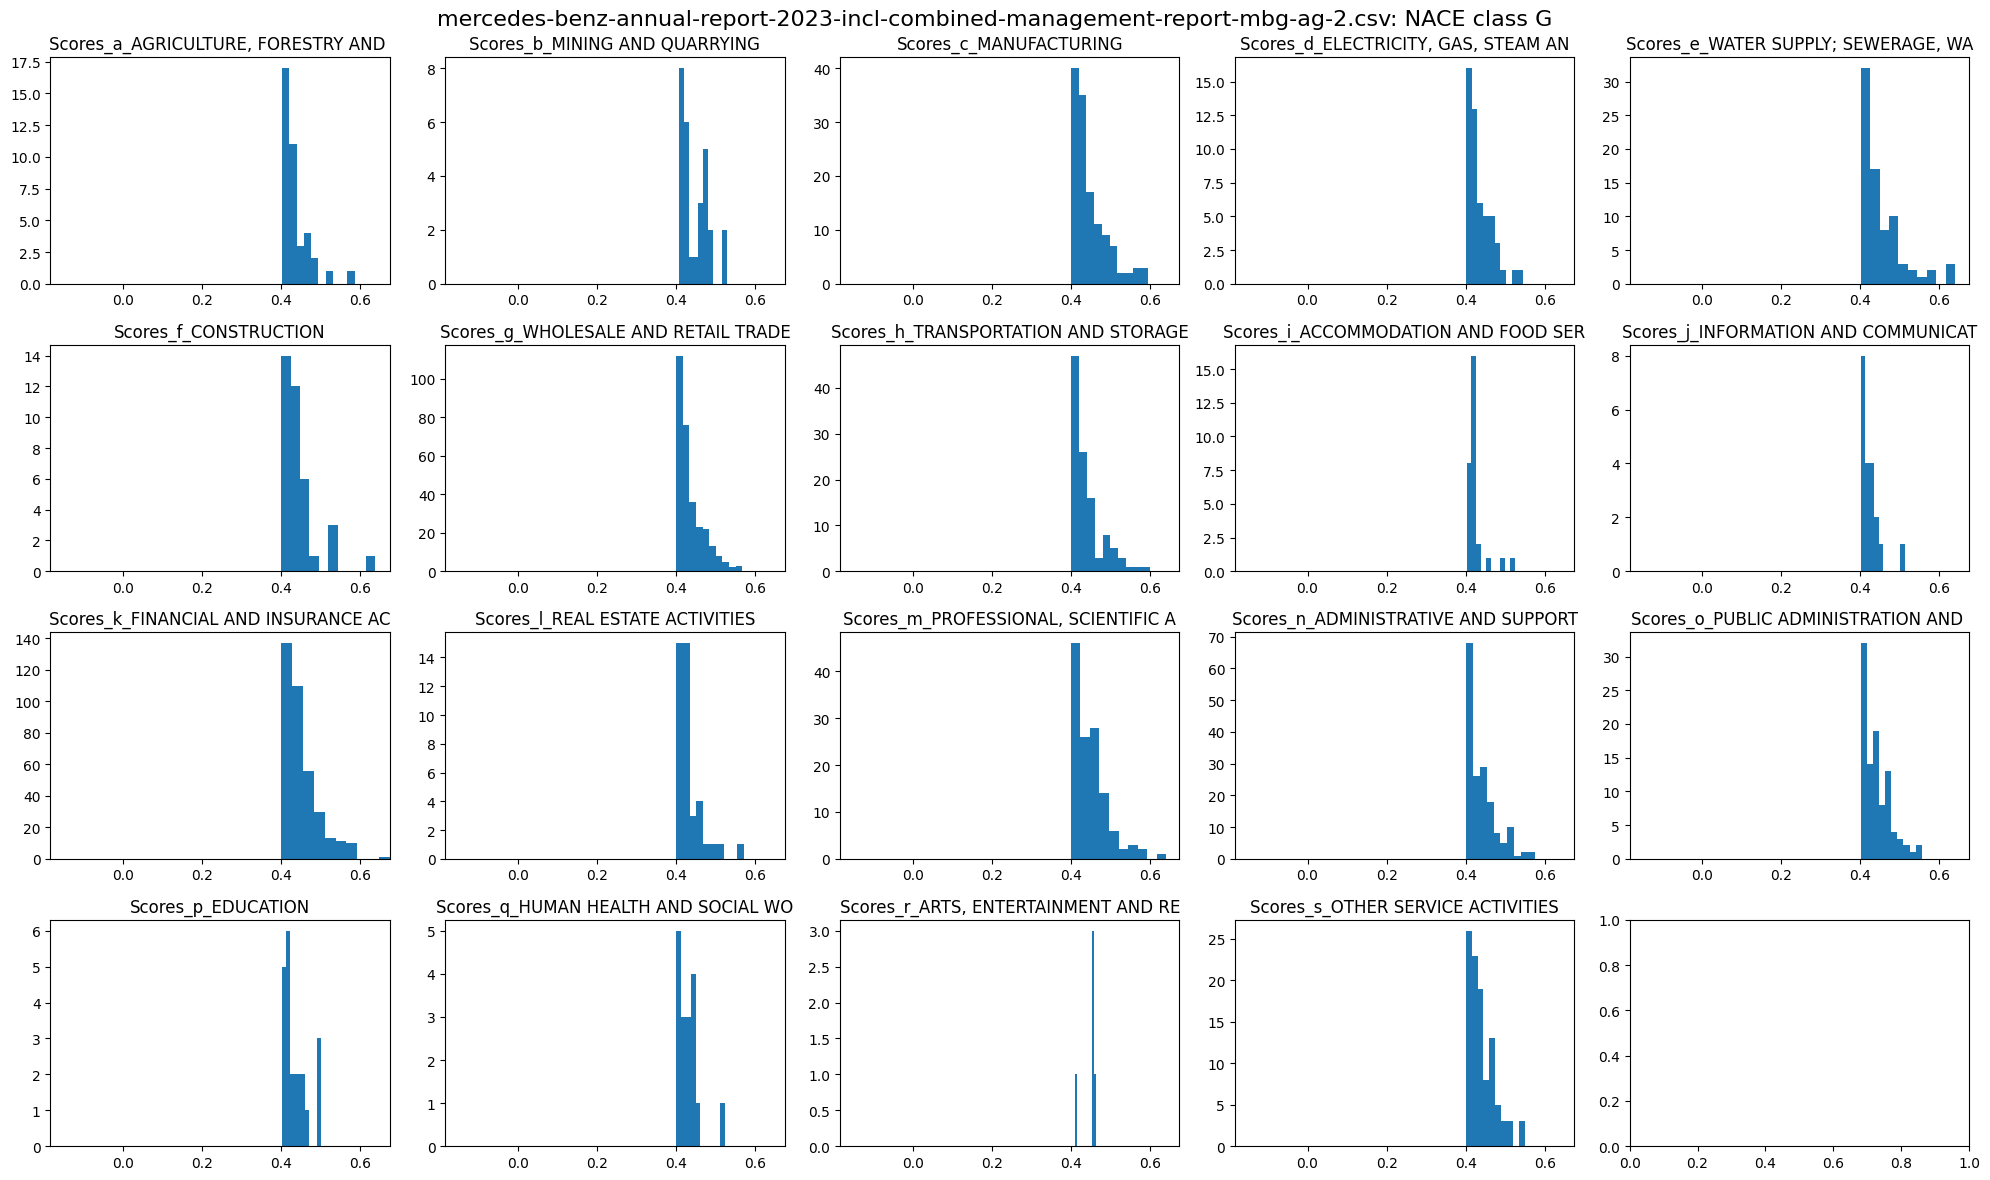

In [33]:
for j in range(len(df_sentence_similarities)):
    fig, axes = plt.subplots(4, 5, figsize=(20, 12))
    axes = axes.flatten()

    min_x = df_sentence_similarities[j][1].iloc[:,3:].min().min()
    max_x = df_sentence_similarities[j][1].iloc[:,3:].max().max()

    for i in range(19):
        axes[i].hist(df_sentence_similarities[j][1].iloc[:,3+i][df_sentence_similarities[j][1].iloc[:,3+i] > cos_threshold])
        axes[i].set_title(df_sentence_similarities[j][1].iloc[:,3+i].name[:35])
        axes[i].set_xlim([min_x, max_x])

    fig.suptitle(f"{df_sentence_similarities[j][0]}.csv: NACE class {NACE_codes[df_sentence_similarities[j][0]+'.csv']}", fontsize=16)
    plt.tight_layout()
    plt.show()